# ME581 Homework 1

*Instructions:*

* The following problems are to be documented, solved, and presented in a Jupyter notebook.
* Save the notebook as a single PDF, then upload and submit the PDF in Gradescope.
* Write your own codes for Bisection, Newton and Secant methods.

# Problem 1

* a) Plot the function $f(x) = 1 - 2*ln(x)$ to verify the presence of zeros in the interval (1,2). Label the exact location of $p = e(1/2)$.

* b) Perform the first five iterations of the bisection method and verify that each approximation satisfies the theoretical error bound of the bisection method.

* c) Check if the error decreases or increases in each iteration. Plot the error versus number of iterations.

* d) As conclusion, list and discuss any two limitations of the bisection method based on the type of function analyzed. Give examples.

## 1.a) Plot the function $f(x) = 1 - 2*ln(x)$ to verify the presence of zeros in the interval (1,2). Label the exact location of $p = e(1/2)$.

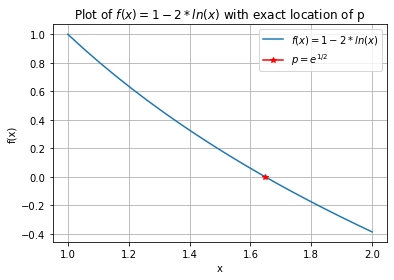

In [1]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd

# Create array of input values to the function (i.e. x) for plotting
x = np.linspace(1,2,20)

# Define Function
def f(x):
    return 1 - 2*(np.log(x))

# Plot the function
plt.plot(x,f(x), label = r'$f(x) = 1 - 2*ln(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(f'Plot of $f(x) = 1 - 2*ln(x)$ with exact location of p')
plt.grid(True) 

# Exact location of p =e(1/2)
p = np.e**(1/2)

# Plot p on the existing plot
plt.plot(p, f(p), label = r'$p = e^{1/2}$', marker = '*', c='r')
plt.legend()
plt.show()

* The function intersects the x - axis at $p = e^{1/2}$ (marked with a red *).
* The root of the given function exists between (1,2) as can be seen from the graph.

$\pagebreak$

## 1.b) Perform the first five iterations of the bisection method and verify that each approximation satisfies the theoretical error bound of the bisection method.

### Define functions to calculate errors and convergence rate.

In [2]:
# Define Function to calculate Absolute error
def abs_error(p_n,p):
    absolute_error = abs(p_n - p)
    print(f'The Absolute Error is: {absolute_error}')
    return absolute_error

# Define Function to calculate Theoretical error
def theo_error(b,a,n):
    theoretical_error = (b-a)/2**n
    print(f'The Theoretical Error is: {theoretical_error}')
    return theoretical_error

# Define Function to check if absolute error is within theoretical error bound
def error_bound(absolute_error,theoretical_error):
    if absolute_error <= theoretical_error:
        print(f'The Absolute Error {absolute_error} is '+
        f'within Theoretical Error Bound {theoretical_error}!')
    else:
        print(f'The Absolute Error {absolute_error} is '+
        f'NOT within Theoretical Error Bound {theoretical_error}!')

# Function to calculate convergence rate        
def convergence_rate(n):
    conv_rate = 1/(2**n)
    print(f'The Convergence Rate for {n} iterations is {conv_rate}')

### Perform 5 iterations of bisection method.
### Verify that each approximation satisfies theoretical error bound of bisection method.

In [3]:
# This script applies the Bisection Method to
# determine the zero of the function
# f(x) = 1 - 2*ln(x) in the range (1,2).

# An Introduction is printed
print('The Bisection Method is applied to calculate')
print('an estimate of the root ''p'' of the function');
print('1 - 2*ln(x) in the range (1,2):\n');

# Given: The function 'f' is redefined here and
# may be used in the manner f(1)=-1.
def f(x):
    var = 1 - 2*(np.log(x))
    return var

# The left- and right-endpoints of the initial interval are
# defined as 'a' and 'b'.

# A and B are defined to calulate theoretical error bounds 
# since these values don't change.
a = 1
A = 1
b = 2
B = 2

# Define actual root
P_actual = np.e**(1/2)

# Create empty lists to store error values
Absolute_Error = []
Theoretical_Error = []

# A convergence tolerance 'epsilon' is chosen and defined.
epsilon = 1e-6

# A maximum number of iterations is chosen and defined.
# This will be used to exit the script if the maximum
# number of iterations is exceeded.
Nmax = 5 # The question states that 5 iterations have to be performed

# An Nmax-by-1 array of NaNs (Not-a-Number) is created to
# store the approximations 'p(ii)' for each iteration 'ii'
p = np.zeros(Nmax)
p.fill(np.nan)

# An index is created to keep track of the iteration number.
ii = 1

# The sign of the function f(x) at the latest value of the
# lower extreme 'a' is calculated and saved as 'sfa'.
# 'a' is the current value of the lower bound,'f()' evaluates
# the function 'f' at that value, and 'sign' calculates the
# sign of that value.
sfa = np.sign( f( a ) )

# A 'for' loop is created.
# For index ii ranging from 0, in increments of 1, up to the
# maximum number of iterations minus one (Nmax-1),
for ii in range(0,Nmax):
   
   # The new approximation 'p(ii)' to the root is
   # calculated as the midpoint of the interval and
   # is stored in the array 'p'.
   p[ii] = a + (b-a)/2
   
   # If the interval b-a is less than twice the tolerance
   # 'epsilon', then the convergence tolerance has been met,
   if ( (b-a) < (2*epsilon) ):
      
      # in which case the final estimate of the root is printed,
      # (Note that a line break '\' is used here inside the 
      # parentheses of the function 'print' and the following
      # line is indented, so that the code when printed will not
      # extend off the page.)
      print('Final Root Estimate...')  
      print("Root Estimate #{0:d}: p({1:d}) = \
            {2:10.9e}".format(ii+1,ii+1,p[ii]))
      err_abs = abs_error(p[ii],P_actual) 
      Absolute_Error.append(err_abs) # Append absolute error in the list
      err_theo = theo_error(B,A,ii+1) # A & B should not be updated
      Theoretical_Error.append(err_theo)
      error_bound(err_abs,err_theo) # Append theoretical error in the list
      
      # and a message is printed to state that the convergence
      # tolerance has been met.
      print("The convergence tolerance has been met.")
      
      # and the 'for' loop is exited
      break
   
   # The value of the current root estimate is printed.
   print('Approximating intermediate root...') 
   print("Root Estimate #{0:d}: p({1:d}) = \
         {2:10.9e}".format(ii+1,ii+1,p[ii]))
   err_abs = abs_error(p[ii],P_actual)
   Absolute_Error.append(err_abs) # Append absolute error in the list
   err_theo = theo_error(B,A,ii+1) # A & B should not be updated
   Theoretical_Error.append(err_theo)
   error_bound(err_abs,err_theo) # Append theoretical error in the list
   print('') # Print an empty string to separate program output

    
   # Save the sign of f(p) as 'sfp'
   sfp = np.sign( f( p[ii] ) );
   
   # If the product of the two signs is less than zero,
   if ( (sfa*sfp) < 0.0 ):
      
      # then the signs of sfa and sfp are different and the new
      # interval will be (a,p), so the current 'p' becomes the new 'b'.
      b = p[ii]
      
   # otherwise (if the product of the two signs is not less than zero,)
   else:
      
      # the new interval will be (p,b), so the value of the current
      # 'p' becomes the new 'a'.
      a = p[ii]
      
      # and the sign of the current 'p', sfp, becomes the new sign of
      # the new 'a', 'sfa'.
      sfa = sfp

# Noting that 'range(0,Nmax)' will iterate ii from 0 to Nmax-1,
# The maximum number of iterations will be met when ii=Nmax-1.
# If the maximum number of iterations has been met,
if (ii >= (Nmax-1)):
   
   # A message is printed.
   print("The maximum number of {0:1} iterations has been met.".format(Nmax))
   print('')

convergence_rate(len(p)) # Call the convergence rate calculation function

The Bisection Method is applied to calculate
an estimate of the root p of the function
1 - 2*ln(x) in the range (1,2):

Approximating intermediate root...
Root Estimate #1: p(1) =          1.500000000e+00
The Absolute Error is: 0.1487212707001282
The Theoretical Error is: 0.5
The Absolute Error 0.1487212707001282 is within Theoretical Error Bound 0.5!

Approximating intermediate root...
Root Estimate #2: p(2) =          1.750000000e+00
The Absolute Error is: 0.1012787292998718
The Theoretical Error is: 0.25
The Absolute Error 0.1012787292998718 is within Theoretical Error Bound 0.25!

Approximating intermediate root...
Root Estimate #3: p(3) =          1.625000000e+00
The Absolute Error is: 0.023721270700128194
The Theoretical Error is: 0.125
The Absolute Error 0.023721270700128194 is within Theoretical Error Bound 0.125!

Approximating intermediate root...
Root Estimate #4: p(4) =          1.687500000e+00
The Absolute Error is: 0.038778729299871806
The Theoretical Error is: 0.0625
The

* 5 iterations of bisection method performed.
* Each approximation satisfies the theoretical error bound.

$\pagebreak$

## 1.c) Check if the error decreases or increases in each iteration. Plot the error versus number of iterations.

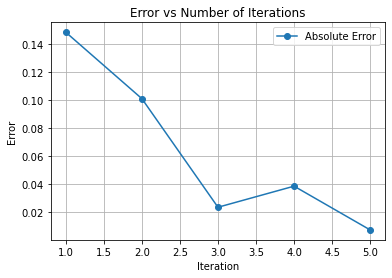

In [4]:
# Create x axis idx for plotting
idx = np.arange(1,len(Absolute_Error)+1)
# Plot the function
plt.plot(idx,Absolute_Error, '-o', label = 'Absolute Error')
plt.title('Error vs Number of Iterations')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

* The absolute error decreases in each iteration except at iteration #4 where we see a slight increase.
* After iteration #4 the error decreases further and is almost 0.
* Since the maximum number of iterations (5) is met the algorithm stops.

$\pagebreak$

## 1.d) As conclusion, list and discuss any two limitations of the bisection method based on the type of function analyzed. Give examples.

1) It is only applicable when the function is continuous in the defined interval. If a different interval is chosen then bisection method will not converge.

In [5]:
# This script applies the Bisection Method to
# determine the zero of the function
# f(x) = 1 - 2*ln(x) in the range (3,4).

# An Introduction is printed
print('The Bisection Method is applied to calculate')
print('an estimate of the root ''p'' of the function');
print('1 - 2*ln(x) in the range (3,4):\n');

# Given: The function 'f' is redefined here and
# may be used in the manner f(1)=-1.
def f(x):
    var = 1 - 2*(np.log(x))
    return var

# The left- and right-endpoints of the initial interval are
# defined as 'a' and 'b'.

# A and B are defined to calulate theoretical error bounds 
# since these values don't change.
a = 3
A = 3
b = 4
B = 4

# Define actual root
P_actual = np.e**(1/2)

# Create empty lists to store error values
Absolute_Error = []
Theoretical_Error = []

# A convergence tolerance 'epsilon' is chosen and defined.
epsilon = 1e-6

# A maximum number of iterations is chosen and defined.
# This will be used to exit the script if the maximum
# number of iterations is exceeded.
Nmax = 5 # The question states that 5 iterations have to be performed

# An Nmax-by-1 array of NaNs (Not-a-Number) is created to
# store the approximations 'p(ii)' for each iteration 'ii'
p = np.zeros(Nmax)
p.fill(np.nan)

# An index is created to keep track of the iteration number.
ii = 1

# The sign of the function f(x) at the latest value of the
# lower extreme 'a' is calculated and saved as 'sfa'.
# 'a' is the current value of the lower bound,'f()' evaluates
# the function 'f' at that value, and 'sign' calculates the
# sign of that value.
sfa = np.sign( f( a ) )

# A 'for' loop is created.
# For index ii ranging from 0, in increments of 1, up to the
# maximum number of iterations minus one (Nmax-1),
for ii in range(0,Nmax):
   
   # The new approximation 'p(ii)' to the root is
   # calculated as the midpoint of the interval and
   # is stored in the array 'p'.
   p[ii] = a + (b-a)/2
   
   # If the interval b-a is less than twice the tolerance
   # 'epsilon', then the convergence tolerance has been met,
   if ( (b-a) < (2*epsilon) ):
      
      # in which case the final estimate of the root is printed,
      # (Note that a line break '\' is used here inside the 
      # parentheses of the function 'print' and the following
      # line is indented, so that the code when printed will not
      # extend off the page.)
      print('Final Root Estimate...')  
      print("Root Estimate #{0:d}: p({1:d}) = \
            {2:10.9e}".format(ii+1,ii+1,p[ii]))
      err_abs = abs_error(p[ii],P_actual) 
      Absolute_Error.append(err_abs) # Append absolute error in the list
      err_theo = theo_error(B,A,ii+1) # A & B should not be updated
      Theoretical_Error.append(err_theo)
      error_bound(err_abs,err_theo) # Append theoretical error in the list
      
      # and a message is printed to state that the convergence
      # tolerance has been met.
      print("The convergence tolerance has been met.")
      
      # and the 'for' loop is exited
      break
   
   # The value of the current root estimate is printed.
   print('Approximating intermediate root...') 
   print("Root Estimate #{0:d}: p({1:d}) = \
         {2:10.9e}".format(ii+1,ii+1,p[ii]))
   err_abs = abs_error(p[ii],P_actual)
   Absolute_Error.append(err_abs) # Append absolute error in the list
   err_theo = theo_error(B,A,ii+1) # A & B should not be updated
   Theoretical_Error.append(err_theo)
   error_bound(err_abs,err_theo) # Append theoretical error in the list
   print('') # Print an empty string to separate program output

    
   # Save the sign of f(p) as 'sfp'
   sfp = np.sign( f( p[ii] ) );
   
   # If the product of the two signs is less than zero,
   if ( (sfa*sfp) < 0.0 ):
      
      # then the signs of sfa and sfp are different and the new
      # interval will be (a,p), so the current 'p' becomes the new 'b'.
      b = p[ii]
      
   # otherwise (if the product of the two signs is not less than zero,)
   else:
      
      # the new interval will be (p,b), so the value of the current
      # 'p' becomes the new 'a'.
      a = p[ii]
      
      # and the sign of the current 'p', sfp, becomes the new sign of
      # the new 'a', 'sfa'.
      sfa = sfp

# Noting that 'range(0,Nmax)' will iterate ii from 0 to Nmax-1,
# The maximum number of iterations will be met when ii=Nmax-1.
# If the maximum number of iterations has been met,
if (ii >= (Nmax-1)):
   
   # A message is printed.
   print("The maximum number of {0:1} iterations has been met.".format(Nmax))
   print('')

convergence_rate(len(p)) # Call the convergence rate calculation function

The Bisection Method is applied to calculate
an estimate of the root p of the function
1 - 2*ln(x) in the range (3,4):

Approximating intermediate root...
Root Estimate #1: p(1) =          3.500000000e+00
The Absolute Error is: 1.8512787292998718
The Theoretical Error is: 0.5
The Absolute Error 1.8512787292998718 is NOT within Theoretical Error Bound 0.5!

Approximating intermediate root...
Root Estimate #2: p(2) =          3.750000000e+00
The Absolute Error is: 2.101278729299872
The Theoretical Error is: 0.25
The Absolute Error 2.101278729299872 is NOT within Theoretical Error Bound 0.25!

Approximating intermediate root...
Root Estimate #3: p(3) =          3.875000000e+00
The Absolute Error is: 2.226278729299872
The Theoretical Error is: 0.125
The Absolute Error 2.226278729299872 is NOT within Theoretical Error Bound 0.125!

Approximating intermediate root...
Root Estimate #4: p(4) =          3.937500000e+00
The Absolute Error is: 2.288778729299872
The Theoretical Error is: 0.0625
Th

* The error keeps on increasing and the root approximations never converge to the actual root value.

2) Choice of epsilon and number of iterations.

* If epsilon is large and number of iterations is small, then the approximate root will have large error.

In [6]:
# This script applies the Bisection Method to
# determine the zero of the function
# f(x) = 1 - 2*ln(x) in the range (1,2).

# An Introduction is printed
print('The Bisection Method is applied to calculate')
print('an estimate of the root ''p'' of the function');
print('1 - 2*ln(x) in the range (1,2):\n');

# Given: The function 'f' is redefined here and
# may be used in the manner f(1)=-1.
def f(x):
    var = 1 - 2*(np.log(x))
    return var

# The left- and right-endpoints of the initial interval are
# defined as 'a' and 'b'.

# A and B are defined to calulate theoretical error bounds 
# since these values don't change.
a = 1
A = 1
b = 2
B = 2

# Define actual root
P_actual = np.e**(1/2)

# Create empty lists to store error values
Absolute_Error = []
Theoretical_Error = []

# A convergence tolerance 'epsilon' is chosen and defined.
epsilon = 0.1

# A maximum number of iterations is chosen and defined.
# This will be used to exit the script if the maximum
# number of iterations is exceeded.
Nmax = 1

# An Nmax-by-1 array of NaNs (Not-a-Number) is created to
# store the approximations 'p(ii)' for each iteration 'ii'
p = np.zeros(Nmax)
p.fill(np.nan)

# An index is created to keep track of the iteration number.
ii = 1

# The sign of the function f(x) at the latest value of the
# lower extreme 'a' is calculated and saved as 'sfa'.
# 'a' is the current value of the lower bound,'f()' evaluates
# the function 'f' at that value, and 'sign' calculates the
# sign of that value.
sfa = np.sign( f( a ) )

# A 'for' loop is created.
# For index ii ranging from 0, in increments of 1, up to the
# maximum number of iterations minus one (Nmax-1),
for ii in range(0,Nmax):
   
   # The new approximation 'p(ii)' to the root is
   # calculated as the midpoint of the interval and
   # is stored in the array 'p'.
   p[ii] = a + (b-a)/2
   
   # If the interval b-a is less than twice the tolerance
   # 'epsilon', then the convergence tolerance has been met,
   if ( (b-a) < (2*epsilon) ):
      
      # in which case the final estimate of the root is printed,
      # (Note that a line break '\' is used here inside the 
      # parentheses of the function 'print' and the following
      # line is indented, so that the code when printed will not
      # extend off the page.)
      print('Final Root Estimate...')  
      print("Root Estimate #{0:d}: p({1:d}) = \
            {2:10.9e}".format(ii+1,ii+1,p[ii]))
      err_abs = abs_error(p[ii],P_actual) 
      Absolute_Error.append(err_abs) # Append absolute error in the list
      err_theo = theo_error(B,A,ii+1) # A & B should not be updated
      Theoretical_Error.append(err_theo)
      error_bound(err_abs,err_theo) # Append theoretical error in the list
      
      # and a message is printed to state that the convergence
      # tolerance has been met.
      print("The convergence tolerance has been met.")
      
      # and the 'for' loop is exited
      break
   
   # The value of the current root estimate is printed.
   print('Approximating intermediate root...') 
   print("Root Estimate #{0:d}: p({1:d}) = \
         {2:10.9e}".format(ii+1,ii+1,p[ii]))
   err_abs = abs_error(p[ii],P_actual)
   Absolute_Error.append(err_abs) # Append absolute error in the list
   err_theo = theo_error(B,A,ii+1) # A & B should not be updated
   Theoretical_Error.append(err_theo)
   error_bound(err_abs,err_theo) # Append theoretical error in the list
   print('') # Print an empty string to separate program output

    
   # Save the sign of f(p) as 'sfp'
   sfp = np.sign( f( p[ii] ) );
   
   # If the product of the two signs is less than zero,
   if ( (sfa*sfp) < 0.0 ):
      
      # then the signs of sfa and sfp are different and the new
      # interval will be (a,p), so the current 'p' becomes the new 'b'.
      b = p[ii]
      
   # otherwise (if the product of the two signs is not less than zero,)
   else:
      
      # the new interval will be (p,b), so the value of the current
      # 'p' becomes the new 'a'.
      a = p[ii]
      
      # and the sign of the current 'p', sfp, becomes the new sign of
      # the new 'a', 'sfa'.
      sfa = sfp

# Noting that 'range(0,Nmax)' will iterate ii from 0 to Nmax-1,
# The maximum number of iterations will be met when ii=Nmax-1.
# If the maximum number of iterations has been met,
if (ii >= (Nmax-1)):
   
   # A message is printed.
   print("The maximum number of {0:1} iterations has been met.".format(Nmax))
   print('')

convergence_rate(len(p)) # Call the convergence rate calculation function

The Bisection Method is applied to calculate
an estimate of the root p of the function
1 - 2*ln(x) in the range (1,2):

Approximating intermediate root...
Root Estimate #1: p(1) =          1.500000000e+00
The Absolute Error is: 0.1487212707001282
The Theoretical Error is: 0.5
The Absolute Error 0.1487212707001282 is within Theoretical Error Bound 0.5!

The maximum number of 1 iterations has been met.

The Convergence Rate for 1 iterations is 0.5


* The absolute error is 0.14 for one iteration. Thus the number of iterations should be sufficiently large to obtain desired precision in the approximate root value.

3) The convergence rate for the function is 0.03 which is slow.

4) The function provided has just one root. If a function has multiple roots then bisection method is not a good technique as it is highly dependent on the choice of intervals.

5) If the function takes values of the same sign then bisection method fails.

$\pagebreak$

# Problem 2

Approximate $1/48$ (up to 5 decimal places) using bisection method to the equation $\frac{1}{x}-48 = 0$. Include plots of:

* a) Approximated value vs Iteration number;

* b) Absolute error vs. Iteration number.


### Plot of $\frac{1}{x}-48 = 0$ with the solution 1/48.

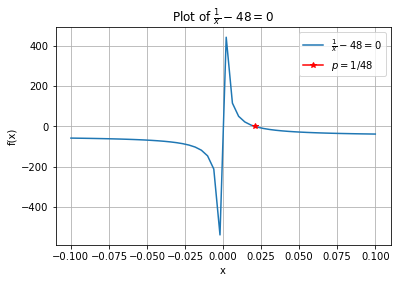

In [7]:
# Create array of input values to the function (i.e. x) for plotting
x = np.linspace(-0.1,0.1,50)

# Define Function
def f(x):
    return (1/x)-48

# Plot the function
plt.plot(x,f(x), label = r'$\frac{1}{x}-48 = 0$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(r'Plot of $\frac{1}{x}-48 = 0$')
plt.grid(True) 

# Exact location of p =e(1/2)
p = 1/48

# Plot p on the existing plot
plt.plot(p, f(p), label = r'$p = 1/48$', marker = '*', c='r')
plt.legend()
plt.show()

* The root lies between 0.001 and 0.025. This will become the end points of our interval.
* Note - If 0 is chosen then we get an error in the code. Hence a non-zero number close to zero has been chosen as the initial interval.

### Approximate $1/48$ (up to 5 decimal places) using bisection method to the equation $\frac{1}{x}-48 = 0$.

In [8]:
print('The Bisection Method is applied to calculate')
print('an estimate of the root ''p'' of the function');
print('(1/x) - 48 in the range (0.001,0.025):\n');

# Given: The function 'f' is redefined here and
# may be used in the manner f(1)=-1.
def f(x):
    var = (1/x)-48
    return var

# The left- and right-endpoints of the initial interval are
# defined as 'a' and 'b'.

# A & B are declared for calculating theoretical error 
# as these values don't change
a = 0.001
A = 0.001
b = 0.025
B = 0.025

P_actual = 1/48

Absolute_Error = []
Theoretical_Error = []

# A convergence tolerance 'epsilon' is chosen and defined.
# Since we need approximate 1/48 upto 5 digits, an epsilon is chosen accordingly
epsilon = 1e-5

# A maximum number of iterations is chosen and defined.
# This will be used to exit the script if the maximum
# number of iterations is exceeded.
# A large value of Nmax is chosen to obtain precision of 5 decimal places 
# before the program terminates due to limited number of iterations
Nmax = 100

# An Nmax-by-1 array of NaNs (Not-a-Number) is created to
# store the approximations 'p(ii)' for each iteration 'ii'
p = np.zeros(Nmax)
p.fill(np.nan)

# An index is created to keep track of the iteration number.
ii = 1

# The sign of the function f(x) at the latest value of the
# lower extreme 'a' is calculated and saved as 'sfa'.
# 'a' is the current value of the lower bound,'f()' evaluates
# the function 'f' at that value, and 'sign' calculates the
# sign of that value.
sfa = np.sign( f( a ) )

# A 'for' loop is created.
# For index ii ranging from 0, in increments of 1, up to the
# maximum number of iterations minus one (Nmax-1),
for ii in range(0,Nmax):
   
   # The new approximation 'p(ii)' to the root is
   # calculated as the midpoint of the interval and
   # is stored in the array 'p'.
   p[ii] = round(a + (b-a)/2,5)
   
   # If the interval b-a is less than twice the tolerance
   # 'epsilon', then the convergence tolerance has been met,
   if ( (b-a) < (2*epsilon) ):
      
      # in which case the final estimate of the root is printed,
      # (Note that a line break '\' is used here inside the 
      # parentheses of the function 'print' and the following
      # line is indented, so that the code when printed will not
      # extend off the page.)
      print('Final Root Estimate...')  
      print("Root Estimate #{0:d}: p({1:d}) = \
            {2:.5f}".format(ii+1,ii+1,p[ii]))
      err_abs = abs_error(p[ii],P_actual)
      Absolute_Error.append(err_abs)
      err_theo = theo_error(B,A,ii+1) # A & B should not be updated
      Theoretical_Error.append(err_theo)
      error_bound(err_abs,err_theo)
      print('')
      
      # and a message is printed to state that the convergence
      # tolerance has been met.
      print("The convergence tolerance has been met.")
      print('')
      
      # and the 'for' loop is exited
      break
   
   # The value of the current root estimate is printed.
   print('Approximating intermediate root...') 
   print("Root Estimate #{0:d}: p({1:d}) = \
         {2:.5f}".format(ii+1,ii+1,p[ii]))
   err_abs = abs_error(p[ii],P_actual)
   Absolute_Error.append(err_abs)
   err_theo = theo_error(B,A,ii+1) # A & B should not be updated
   Theoretical_Error.append(err_theo)
   error_bound(err_abs,err_theo)
   print('')

    
   # Save the sign of f(p) as 'sfp'
   sfp = np.sign( f( p[ii] ) );
   
   # If the product of the two signs is less than zero,
   if ( (sfa*sfp) < 0.0 ):
      
      # then the signs of sfa and sfp are different and the new
      # interval will be (a,p), so the current 'p' becomes the new 'b'.
      b = p[ii]
      
   # otherwise (if the product of the two signs is not less than zero,)
   else:
      
      # the new interval will be (p,b), so the value of the current
      # 'p' becomes the new 'a'.
      a = p[ii]
      
      # and the sign of the current 'p', sfp, becomes the new sign of
      # the new 'a', 'sfa'.
      sfa = sfp

# Noting that 'range(0,Nmax)' will iterate ii from 0 to Nmax-1,
# The maximum number of iterations will be met when ii=Nmax-1.
# If the maximum number of iterations has been met,
if (ii >= (Nmax-1)):
   
   # A message is printed.
   print("The maximum number of {0:1} iterations has been met.".format(Nmax))
   print('')

convergence_rate(len(Absolute_Error))

The Bisection Method is applied to calculate
an estimate of the root p of the function
(1/x) - 48 in the range (0.001,0.025):

Approximating intermediate root...
Root Estimate #1: p(1) =          0.01300
The Absolute Error is: 0.007833333333333333
The Theoretical Error is: 0.012
The Absolute Error 0.007833333333333333 is within Theoretical Error Bound 0.012!

Approximating intermediate root...
Root Estimate #2: p(2) =          0.01900
The Absolute Error is: 0.0018333333333333326
The Theoretical Error is: 0.006
The Absolute Error 0.0018333333333333326 is within Theoretical Error Bound 0.006!

Approximating intermediate root...
Root Estimate #3: p(3) =          0.02200
The Absolute Error is: 0.0011666666666666665
The Theoretical Error is: 0.003
The Absolute Error 0.0011666666666666665 is within Theoretical Error Bound 0.003!

Approximating intermediate root...
Root Estimate #4: p(4) =          0.02050
The Absolute Error is: 0.0003333333333333313
The Theoretical Error is: 0.0015
The Absol

## 2.a) Approximated value vs Iteration number

In [9]:
# Display p
print(p)

# Remove nan from the list of approximate roots
p_n = [x for x in p if np.isnan(x) == False]
#p_n = round(p_n,5)
print(p_n)

[0.013   0.019   0.022   0.0205  0.02125 0.02088 0.02069 0.02078 0.02083
 0.02086 0.02085 0.02084     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan]
[0.013, 0.019, 0.022, 0.0205, 0.02125, 0.02088, 0.02069, 0.02078, 0.02083, 0.02086, 0.02085, 0.02084]


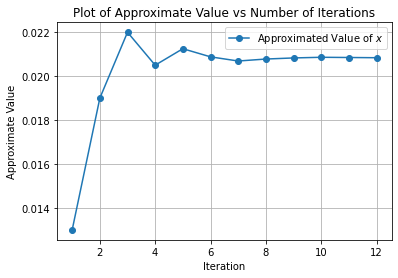

In [10]:
idx = np.arange(1,len(p_n)+1)
# Plot the function
plt.plot(idx,p_n, '-o', label = r'Approximated Value of $x$')
plt.title('Plot of Approximate Value vs Number of Iterations')
plt.xlabel('Iteration')
plt.ylabel('Approximate Value')
plt.legend()
plt.grid(True) 

* The approximate value stabilizes after iteration 6.

$\pagebreak$

## 2.b) Absolute error vs. Iteration number.

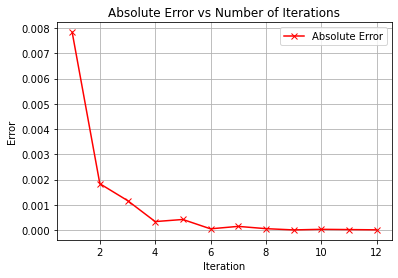

In [11]:
idx = np.arange(1,len(Absolute_Error)+1)
# Plot the function
plt.plot(idx,Absolute_Error, '-x', c='r', label = 'Absolute Error')
plt.title('Absolute Error vs Number of Iterations')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

* After iteration 4 the reduction in error is very less.
* After iteration 6 the error stabilizes.

$\pagebreak$

# Problem 3

The equation $x^3 − 15 = 0$ has a root on the interval $(2,3)$, namely $p = \sqrt[3]{15}$.

* a) Perform five iterations of Newton’s method.

* b) For $n \geqslant 1$, print the comparison of $|p_n - p_{n-1}|$ with $|p_{n-1} - p|$ and $|p_n - p|$.

* c) For $n \geqslant 1$, print computation of the ratio $|p_n - p|/|p_{n-1} - p|^2$ and show that this value approaches $|f''(p) / 2f'(p)|$.

In [12]:
# Encode the equation in a function
def f(x):
    return x**3 - 15

# Encode derivative for the equation in a function
def df1(x):
    return 3*x**2

# Declare actual root p
p = 15**(1/3)
p

2.46621207433047

### Plot of the function $f(x) = x^3 − 15$ with actual root p

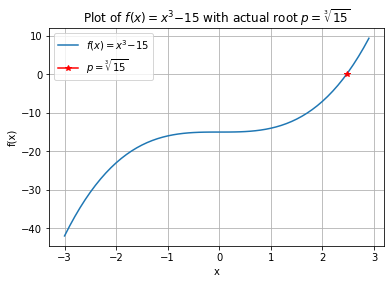

In [13]:
# Plot the equation
t = np.arange(-3, 3, 0.1)
s = f(t)  
plt.plot(t, s, label = r'$f(x) = x^3 − 15$') 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r'Plot of $f(x) = x^3 − 15$ with actual root $p = \sqrt[3]{15}$')

# Plot p on the existing plot
plt.plot(p, f(p), label = r'$p = \sqrt[3]{15}$', marker = '*', c='r')

plt.legend()
plt.grid(True) 
plt.show()   

* The root is between 2 and 3 as per the graph above. We need to approximate this value as actual root is known.

## 3.a) Perform five iterations of Newton’s method.

In [14]:
# Encode Newton's Method
def g(x,f,df1):
    return x-f(x)/df1(x)

# Since 5 iterations of Newton's method is required and 
# initial guess is provided we choose Nmax as 6
Nmax = 6
xn = np.zeros(Nmax)
xn[0] = 5 # Initial guess
print(xn)

[5. 0. 0. 0. 0. 0.]


In [15]:
# Calculate root approximations using Newton's method
for i in range(1,Nmax):
    xn[i]=g(xn[i-1],f,df1)
print(xn)

[5.         3.53333333 2.75605395 2.49562492 2.46655737 2.46621212]


* The last root approximation of xn is very close to the actual root p.

### Plot the graph of root approximations

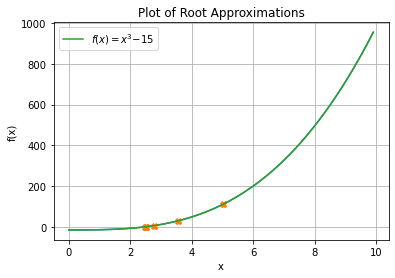

In [16]:
t = np.arange(0, 10.0, 0.1)  
s = f(t)  
fn= f(xn)
plt.plot(t, s)  
plt.plot(xn, fn,"X")  
plt.plot(t, s, label = r'$f(x) = x^3 − 15$') 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of Root Approximations')
plt.legend()
plt.grid(True)
plt.show() 

* From the above graph it is seen that the first approximation was chosen arbitrarily as 5.
* Newton's method approximated the function to the actual root p and the trend of subsequent approximate roots can be seen in the graph.

$\pagebreak$

## 3.b) For $n \geqslant 1$, print the comparison of $|p_n - p_{n-1}|$ with $|p_{n-1} - p|$ and $|p_n - p|$.

### Calculate $|p_n - p_{n-1}|$

* Since $n \geqslant 1$, $p_n$ is $p_1$ and $p_{n-1}$ is $p_0$ for n=1 and so on...

In [17]:
# Create an empty list to store the error
err1 = []

for idx in range(len(xn)-1):
    e = abs(xn[idx+1] - xn[idx]) #idx+1 implies p_n and idx implies p_{n-1}
    err1.append(e)
err1

[1.4666666666666668,
 0.7772793797713695,
 0.2604290339264437,
 0.029067554320003186,
 0.0003452426503507411]

### Calculate $|p_{n-1} - p|$

* Since $n \geqslant 1$, $p_{n-1}$ is $p_0$ for n=1 and $p$ is $p = \sqrt[3]{15}$ and so on...

In [18]:
# Actual root p is
p = 15**(1/3)

# Create an empty list to store the error
err2 = []

for idx in range(len(xn)-1):
    e = abs(xn[idx] - p) 
    err2.append(e)
err2

[2.53378792566953,
 1.0671212590028634,
 0.28984187923149385,
 0.029412845305050173,
 0.0003452909850469865]

### Calculate $|p_n - p|$

* Since $n \geqslant 1$, $p_n$ is $p_1$ for n=1 and $p$ is $p = \sqrt[3]{15}$ and so on...

In [19]:
# Actual root p is
p = 15**(1/3)

# Create an empty list to store the error
err3 = []

for idx in range(len(xn)-1):
    e = abs(xn[idx+1] - p)
    err3.append(e)
err3

[1.0671212590028634,
 0.28984187923149385,
 0.029412845305050173,
 0.0003452909850469865,
 4.8334696245433406e-08]

### Print the comparison of $|p_n - p_{n-1}|$ with $|p_{n-1} - p|$ and $|p_n - p|$.

In [20]:
# Comparison of the three errors in the form of a table
import pandas as pd

err_comp = pd.DataFrame(list(zip(err1, err2, err3)),
               columns =['|p_n - p_{n-1}|', '|p_{n-1} - p|', '|p_n - p|'])
err_comp

,|p_n - p_{n-1}|,|p_{n-1} - p|,|p_n - p|
0,1.466667,2.533788,1.067121e+00
1,0.777279,1.067121,2.898419e-01
2,0.260429,0.289842,2.941285e-02
3,0.029068,0.029413,3.452910e-04
4,0.000345,0.000345,4.833470e-08


* All the errors converge to 0.

### Plot of $|p_n - p_{n-1}|$ with $|p_{n-1} - p|$ and $|p_n - p|$ for comparison.

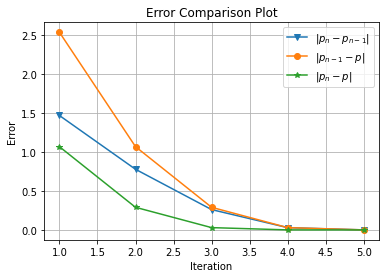

In [21]:
x_temp = np.arange(1, 6, 1)  
plt.plot(x_temp, err1, label = r'$|p_n - p_{n-1}|$', marker = 'v')
plt.plot(x_temp, err2, label = r'$|p_{n-1} - p|$', marker = 'o')
plt.plot(x_temp, err3, label = r'$|p_n - p|$', marker = '*')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Comparison Plot')
plt.legend()
plt.grid(True)
plt.show()

$\pagebreak$

## 3.c) For $n \geqslant 1$, print computation of the ratio $|p_n - p|/|p_{n-1} - p|^2$ and show that this value approaches $|f''(p) / 2f'(p)|$.

### Computation of the ratio $|p_n - p|/|p_{n-1} - p|^2$

In [22]:
ratio1 = err_comp.iloc[:,2]/err_comp.iloc[:,1]**2
ratio1

0    0.166216
1    0.254527
2    0.350118
3    0.399127
4    0.405404
dtype: float64

* The ratio approaches 0.4.

### Computing $|f''(p) / 2f'(p)|$

In [23]:
# Encode second derivative for the equation in a function
def df2(x):
    return 6*x

# Define actual root
p = 15**(1/3)

# Calculate ratio
ratio2 = df2(p)/(2*df1(p))
ratio2

0.4054801330382267

* The ratio $|p_n - p|/|p_{n-1} - p|^2$ approaches $|f''(p) / 2f'(p)|$ at approximately 0.4

### Plot of $|p_n - p|/|p_{n-1} - p|^2$ and $|f''(p) / 2f'(p)|$

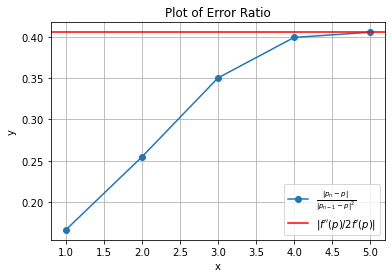

In [24]:
x_axis = np.linspace(1,5,5)
plt.plot(x_axis, ratio1, label = r'$\frac{|p_n - p|}{|p_{n-1} - p|^2}$', marker = 'o')
plt.axhline(y=ratio2, c = 'r', label = r"$|f''(p) / 2f'(p)|$")
plt.legend()
plt.title(r"Plot of Error Ratio")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

* From the above plot it is observed that the ratio $|p_n - p|/|p_{n-1} - p|^2$ approaches $|f''(p) / 2f'(p)|$ which is the asymptotic error constant for Newton's method $\lambda$.

$\pagebreak$

# Problem 4

For each of the functions given below, use the Newton’s method algorithm to approximate all real roots. Use an absolute tolerance of $10^{-6}$ as a stopping condition. For each of the roots plot the logarithm of the absolute error $|e_n|$ at each iteration n against the logarithm of the absolute error at the previous iteration. Use this plot to calculate the order of convergence.
* a) $f(x) = e^x + x^2 − x − 7$

* b) $f(x) = x^3 - x^2 - 9x + 4$

* c) $f(x) = 1.08 − 1.03x + ln (x)$

## 4.a) $f(x) = e^x + x^2 − x − 7$

### Plot the function

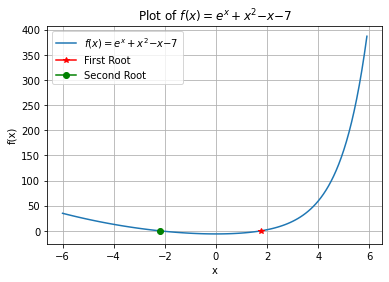

In [25]:
# Encode the equation in a function
def f(x):
    return np.exp(x) + x**2 - x - 7

# Encode derivative for the equation in a function
def df1(x):
    return np.exp(x) + 2*x - 1

# Actual Roots (only for indicating the location of real roots)
P1 = 1.74184
P2 = -2.17132

# Plot the graph of the function and indicate the real roots
x = np.arange(-6, 6, 0.1)
y = f(x)  
plt.plot(x, y, label = r'$f(x) = e^x + x^2 − x − 7$')
plt.plot(P1, f(P1), label = 'First Root', marker = '*', c='r')
plt.plot(P2, f(P2), label = 'Second Root', marker = 'o', c='g')
plt.title(r'Plot of $f(x) = e^x + x^2 − x − 7$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True) 
plt.show()   

* This function has 2 roots as it intercepts the x-axis at two points in the above graph.
* One of the roots is between 1 & 2.
* The other root is between -3 & -2.

### Use Newton’s method algorithm to approximate all real roots

In [26]:
# Function to find the root
def newton( x ):
    h = f(x) / df1(x) # This should approach 0 for convergence
    while abs(h) >= 1e-6: # Tolerance specified as given in the question
        h = f(x)/df1(x)
        # x(i+1) = x(i) - f(x) / f'(x)
        x = x - h
        print(f'Approximate Root is {x}')
        roots.append(x)
     
    print("The final approximation of the root is : ",
                             "%.4f"% x)
    
    
# Call function to approximate first root
roots = []
x0 = 5 # Initial values assumed
newton(x0)

# Store the approximations of root 1 in a list
r1 = roots

Approximate Root is 3.9745891638106734
Approximate Root is 3.0099248158983762
Approximate Root is 2.245844838332549
Approximate Root is 1.840409397691763
Approximate Root is 1.7462200861494144
Approximate Root is 1.7418486716996278
Approximate Root is 1.7418396618161804
Approximate Root is 1.7418396617779879
The final approximation of the root is :  1.7418


* The final approximate root value of the given function is very close to the actual first root.

In [27]:
# Call function to approximate second root
roots = []
x0 = -5 # Initial values assumed
newton(x0)

# Store the approximations of root 2
r2 = roots

Approximate Root is -2.9071964412311306
Approximate Root is -2.254271853844947
Approximate Root is -2.17266627832809
Approximate Root is -2.171324658628406
Approximate Root is -2.171324294771166
The final approximation of the root is :  -2.1713


* The final approximate root value of the given function is very close to the actual second root.

### Plot the approximate values of the root

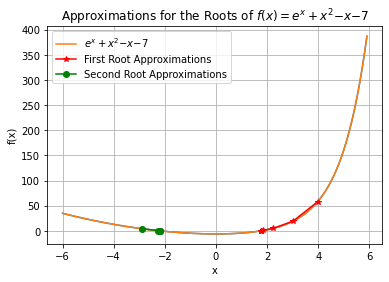

In [28]:
# Plot the approximations
t = np.arange(-6, 6, 0.1)  
s = f(t) 
plt.plot(t, s)
plt.plot(t, s, label = r'$e^x + x^2 − x − 7$') 

r1_1 = np.array(r1)
plt.plot(r1_1, f(r1_1), label = 'First Root Approximations', marker = '*', c='r')

r2_1 = np.array(r2)
plt.plot(r2_1, f(r2_1), label = 'Second Root Approximations', marker = 'o', c='g')

plt.title(r'Approximations for the Roots of $f(x) = e^x + x^2 − x − 7$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show() 

### Plot the logarithm of the absolute error $|e_n|$ at each iteration n against the logarithm of the absolute error at the previous iteration

### First Root

In [29]:
# Calculate the absolute error in the iteration n
er=np.zeros(len(r1))
for i in range(0,len(r1)-1):
    er[i]=np.abs(r1[i+1]-r1[i])
print(er)

[9.64664348e-01 7.64079978e-01 4.05435441e-01 9.41893115e-02
 4.37141445e-03 9.00988345e-06 3.81925602e-11 0.00000000e+00]


In [30]:
# Calculate error in the previous iteration
erp=np.zeros(len(r1))
for i in range(0,len(r1)-1):
    erp[i]=er[i+1]
    
print(erp)

[7.64079978e-01 4.05435441e-01 9.41893115e-02 4.37141445e-03
 9.00988345e-06 3.81925602e-11 0.00000000e+00 0.00000000e+00]


In [31]:
# Take logarithm of the absolute errors
# Create empty lists to store the logarithm of the error
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)      


erNew,erpNew

([-0.03597506414626362,
  -0.26908281261668154,
  -0.9027936273723752,
  -2.362448569417688,
  -5.432668649525303,
  -11.617188422352275,
  -23.988380377778025,
  None],
 [-0.26908281261668154,
  -0.9027936273723752,
  -2.362448569417688,
  -5.432668649525303,
  -11.617188422352275,
  -23.988380377778025,
  None,
  None])

In [32]:
# For plotting alpha = 2
erSquared = []
for i in range(0,len(er)):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)

print(erSquared)

[-0.07195012829252724, -0.538165625233363, -1.8055872547447507, -4.724897138835376, -10.865337299050607, -23.23437684470455, -47.97676075555605, None]


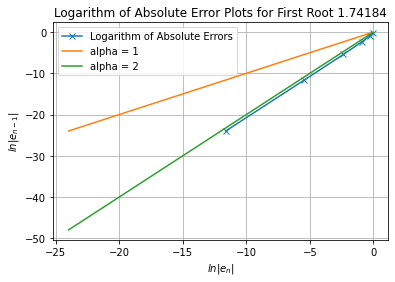

In [33]:
plt.plot(erNew, erpNew, marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title(f'Logarithm of Absolute Error Plots for First Root {r1[-1]:.5f}')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

* For the first root, the order of convergence is quadratic.

In [34]:
erNew,erpNew

([-0.03597506414626362,
  -0.26908281261668154,
  -0.9027936273723752,
  -2.362448569417688,
  -5.432668649525303,
  -11.617188422352275,
  -23.988380377778025,
  None],
 [-0.26908281261668154,
  -0.9027936273723752,
  -2.362448569417688,
  -5.432668649525303,
  -11.617188422352275,
  -23.988380377778025,
  None,
  None])

In [35]:
# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
slope

2.00034803183608

### Second Root

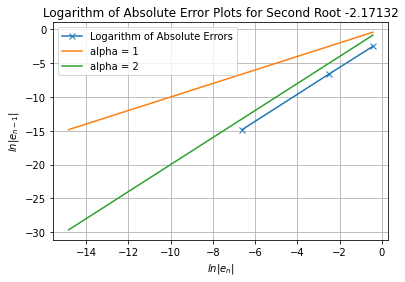

In [36]:
# Calculate the absolute error in the iteration n
er=np.zeros(len(r2))
for i in range(0,len(r2)-1):
    er[i]=np.abs(r2[i+1]-r2[i])

# Calculate error in the previous iteration
erp=np.zeros(len(r2))
for i in range(0,len(r2)-1):
    erp[i]=er[i+1]
    
# Take logarithm of the absolute errors
# Create empty lists to store the logarithm of the error
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)      

# For plotting alpha = 2
erSquared = []
for i in range(0,len(er)):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)

plt.plot(erNew, erpNew, marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title(f'Logarithm of Absolute Error Plots for Second Root {r2[-1]:.5f}')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

* The convergence is quadrtic.

In [37]:
erNew,erpNew

([-0.42629364276652815,
  -2.505857691933824,
  -6.613877663839132,
  -14.826504244334497,
  None],
 [-2.505857691933824, -6.613877663839132, -14.826504244334497, None, None])

In [38]:
# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
slope

1.9991690976824372

$\pagebreak$

## 4.b) $f(x) = x^3 - x^2 - 9x + 4$

### Plot the function

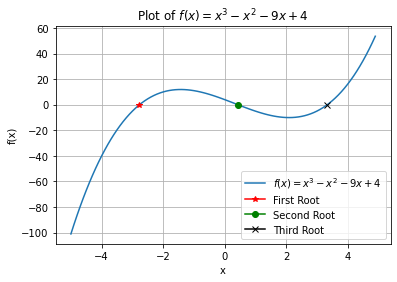

In [39]:
# Encode the equation in a function
def f(x):
    return x**3 - x**2 - 9*x +4

# Encode derivative for the equation in a function
def df1(x):
    return 3*x**2 - 2*x - 9

# Actual Roots
P1 = -2.7702
P2 = 0.43264
P3 = 3.3375

x = np.arange(-5, 5, 0.1)
y = f(x)  
plt.plot(x, y, label = r'$f(x) = x^3 - x^2 - 9x + 4$')

plt.plot(P1, f(P1), label = 'First Root', marker = '*', c='r')
plt.plot(P2, f(P2), label = 'Second Root', marker = 'o', c='g')
plt.plot(P3, f(P3), label = 'Third Root', marker = 'x', c='k')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(r'Plot of $f(x) = x^3 - x^2 - 9x + 4$')
plt.grid(True) 
plt.show()   

* This function has 3 roots as indicated in the plot above.
* Root 1 is between -4 and -2
* Root 2 is between 0 and 2
* Root 3 is between 2 and 4

### Use Newton’s method algorithm to approximate all real roots

In [40]:
# Function to find the root
def newton( x ):
    h = f(x) / df1(x) # This should approach 0 for convergence
    while abs(h) >= 1e-6: # Tolerance specified as given in the question
        h = f(x)/df1(x)
        # x(i+1) = x(i) - f(x) / f'(x)
        x = x - h
        print(f'Approximate Root is {x}')
        roots.append(x)
     
    print("The final approximation of the root is : ",
                             "%.4f"% x)
    
    
# Call function to approximate first root
roots = []
x0 = -10 # Initial values assumed
newton(x0)

# Store the approximations of root 1 in a list
r1 = roots

Approximate Root is -6.765273311897106
Approximate Root is -4.717006005253885
Approximate Root is -3.515073660663122
Approximate Root is -2.9409160313396985
Approximate Root is -2.7824894518233685
Approximate Root is -2.7702335890692984
Approximate Root is -2.770161912793813
Approximate Root is -2.7701619103485644
The final approximation of the root is :  -2.7702


In [41]:
# Call function to approximate second root
roots = []
x0 = 1.5 # Initial values assumed
newton(x0)

# Store the approximations of root 2
r2 = roots

Approximate Root is -0.09523809523809534
Approximate Root is 0.45669039627211583
Approximate Root is 0.43262308530634996
Approximate Root is 0.43264462689363387
Approximate Root is 0.4326446269084917
The final approximation of the root is :  0.4326


In [42]:
# Call function to approximate second root
roots = []
x0 = 10 # Initial values assumed
newton(x0)

# Store the approximations of root 2
r3 = roots

Approximate Root is 6.99630996309963
Approximate Root is 5.1025829691968125
Approximate Root is 4.000906182345245
Approximate Root is 3.4842030077355908
Approximate Root is 3.3473083271829367
Approximate Root is 3.3375656048245697
Approximate Root is 3.3375172846261325
Approximate Root is 3.337517283440073
The final approximation of the root is :  3.3375


### Plot the approximate values of the root

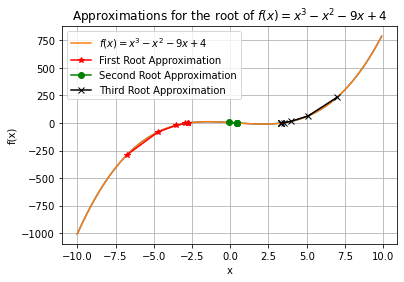

In [43]:
t = np.arange(-10, 10, 0.1)  
s = f(t) 
plt.plot(t, s)
plt.plot(t, s, label = r'$f(x) = x^3 - x^2 - 9x + 4$') 

r1_1 = np.array(r1)
plt.plot(r1_1, f(r1_1), label = 'First Root Approximation', marker = '*', c='r')

r2_1 = np.array(r2)
plt.plot(r2_1, f(r2_1), label = 'Second Root Approximation', marker = 'o', c='g')

r3_1 = np.array(r3)
plt.plot(r3_1, f(r3_1), label = 'Third Root Approximation', marker = 'x', c='k')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(r'Approximations for the root of $f(x) = x^3 - x^2 - 9x + 4$')
plt.grid(True)
plt.show() 

### Plot the logarithm of the absolute error $|e_n|$ at each iteration n against the logarithm of the absolute error at the previous iteration

### First Root

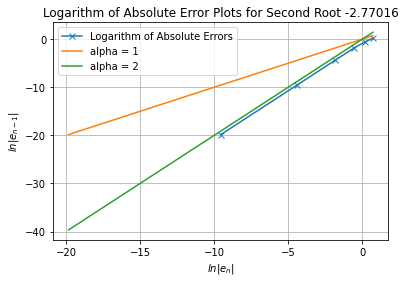

In [44]:
# Calculate the absolute error in the iteration n
er=np.zeros(len(r1))
for i in range(0,len(r1)-1):
    er[i]=np.abs(r1[i+1]-r1[i])

# Calculate error in the previous iteration
erp=np.zeros(len(r1))
for i in range(0,len(r1)-1):
    erp[i]=er[i+1]
    
# Take logarithm of the absolute errors
# Create empty lists to store the logarithm of the error
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)      

# For plotting alpha = 2
erSquared = []
for i in range(0,len(er)):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)

plt.plot(erNew, erpNew, marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title(f'Logarithm of Absolute Error Plots for Second Root {r1[-1]:.5f}')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

In [45]:
# The order of convergence is quadratic
erNew,erpNew

([0.7169942194820452,
  0.18393054883071583,
  -0.5548513048164837,
  -1.8424640137018222,
  -4.4017508643111185,
  -9.543350750949706,
  -19.82911910438916,
  None],
 [0.18393054883071583,
  -0.5548513048164837,
  -1.8424640137018222,
  -4.4017508643111185,
  -9.543350750949706,
  -19.82911910438916,
  None,
  None])

In [46]:
# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
slope

2.0004995682703655

### Second Root

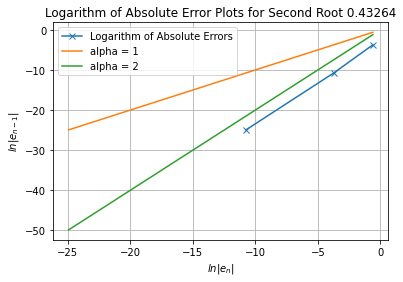

In [47]:
# Calculate the absolute error in the iteration n
er=np.zeros(len(r2))
for i in range(0,len(r2)-1):
    er[i]=np.abs(r2[i+1]-r2[i])

# Calculate error in the previous iteration
erp=np.zeros(len(r2))
for i in range(0,len(r2)-1):
    erp[i]=er[i+1]
    
# Take logarithm of the absolute errors
# Create empty lists to store the logarithm of the error
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)      

# For plotting alpha = 2
erSquared = []
for i in range(0,len(er)):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)

plt.plot(erNew, erpNew, marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title(f'Logarithm of Absolute Error Plots for Second Root {r2[-1]:.5f}')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

In [48]:
# Convergence is quadratic
erNew,erpNew

([-0.5943367854621973,
  -3.7269007506791,
  -10.745525198890565,
  -24.932493633476614,
  None],
 [-3.7269007506791, -10.745525198890565, -24.932493633476614, None, None])

In [49]:
# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
slope

2.0213317494429086

### Third Root

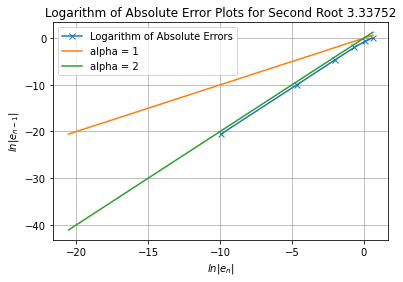

In [50]:
# Calculate the absolute error in the iteration n
er=np.zeros(len(r3))
for i in range(0,len(r3)-1):
    er[i]=np.abs(r3[i+1]-r3[i])

# Calculate error in the previous iteration
erp=np.zeros(len(r3))
for i in range(0,len(r3)-1):
    erp[i]=er[i+1]
    
# Take logarithm of the absolute errors
# Create empty lists to store the logarithm of the error
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)      

# For plotting alpha = 2
erSquared = []
for i in range(0,len(er)):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)

plt.plot(erNew, erpNew, marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title(f'Logarithm of Absolute Error Plots for Second Root {r3[-1]:.5f}')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

* The order of convergence is quadratic.

In [51]:
erNew,erpNew

([0.6385468417675938,
  0.0968333708428782,
  -0.6602866996984774,
  -1.9885434038878507,
  -4.631234697468928,
  -9.937660897617128,
  -20.55262920466786,
  None],
 [0.0968333708428782,
  -0.6602866996984774,
  -1.9885434038878507,
  -4.631234697468928,
  -9.937660897617128,
  -20.55262920466786,
  None,
  None])

In [52]:
# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
slope

2.000398744215885

$\pagebreak$

## 4.c) $f(x) = 1.08 − 1.03x + ln (x)$

### Plot the function

<ipython-input-53-0ee7308cd204>:3: RuntimeWarning: invalid value encountered in log
  return 1.08 - 1.03*x + np.log(x)


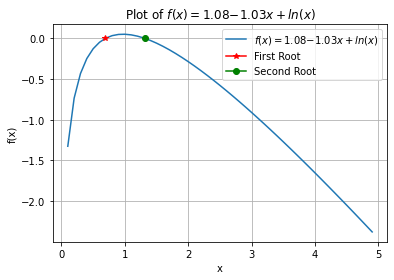

In [53]:
# Encode the equation in a function
def f(x):
    return 1.08 - 1.03*x + np.log(x)

# Encode derivative for the equation in a function
def df1(x):
    return (1/x) - 1.03

# Actual Roots
P1 = 0.694251590625202
P2 = 1.31271895789834

x = np.arange(-5, 5, 0.1)
y = f(x)  
plt.plot(x, y, label = r'$f(x) = 1.08 − 1.03x + ln (x)$')

plt.plot(P1, f(P1), label = 'First Root', marker = '*', c='r')
plt.plot(P2, f(P2), label = 'Second Root', marker = 'o', c='g')
plt.title(r'Plot of $f(x) = 1.08 − 1.03x + ln (x)$')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True) 
plt.show()   

* The function has 2 roots as indicated above.
* One of the roots is between 0 and 1.
* The second root is between 1 and 2.

### Use Newton’s method algorithm to approximate all real roots

In [54]:
# Function to find the root
def newton( x ):
    h = f(x) / df1(x) # This should approach 0 for convergence
    while abs(h) >= 1e-6: # Tolerance specified as given in the question
        h = f(x)/df1(x)
        # x(i+1) = x(i) - f(x) / f'(x)
        x = x - h
        print(f'Approximate Root is {x}')
        roots.append(x)
     
    print("The final approximation of the root is : ",
                             "%.4f"% x)
    
    
# Call function to approximate first root
roots = []
x0 = 0.1 # Initial values assumed
newton(x0)

# Store the approximations of root 1 in a list
r1 = roots

Approximate Root is 0.24777983199487685
Approximate Root is 0.43755298768508527
Approximate Root is 0.5946592119172813
Approximate Root is 0.6748662976716914
Approximate Root is 0.693355528107986
Approximate Root is 0.6942495667306402
Approximate Root is 0.6942515906148488
Approximate Root is 0.6942515906252026
The final approximation of the root is :  0.6943


In [55]:
# Call function to approximate second root
roots = []
x0 = 10 # Initial values assumed
newton(x0)

# Store the approximations of root 2
r2 = roots

Approximate Root is 2.5619194548323074
Approximate Root is 1.5957610781958962
Approximate Root is 1.3570464023345523
Approximate Root is 1.3145797191763262
Approximate Root is 1.3127226813884798
Approximate Root is 1.3127189579133365
Approximate Root is 1.3127189578983387
The final approximation of the root is :  1.3127


<ipython-input-53-0ee7308cd204>:3: RuntimeWarning: invalid value encountered in log
  return 1.08 - 1.03*x + np.log(x)


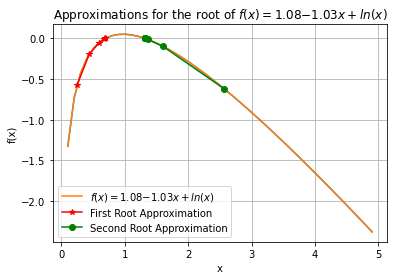

In [56]:
t = np.arange(-5, 5, 0.1)  
s = f(t) 
plt.plot(t, s)
plt.plot(t, s, label = r'$f(x) = 1.08 − 1.03x + ln (x)$') 

r1_1 = np.array(r1)
plt.plot(r1_1, f(r1_1), label = 'First Root Approximation', marker = '*', c='r')

r2_1 = np.array(r2)
plt.plot(r2_1, f(r2_1), label = 'Second Root Approximation', marker = 'o', c='g')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(r'Approximations for the root of $f(x) = 1.08 − 1.03x + ln (x)$')

plt.grid(True)
plt.show() 

### Plot the logarithm of the absolute error $|e_n|$ at each iteration n against the logarithm of the absolute error at the previous iteration

### First Root

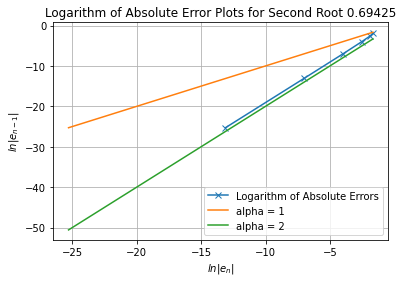

In [57]:
# Calculate the absolute error in the iteration n
er=np.zeros(len(r1))
for i in range(0,len(r1)-1):
    er[i]=np.abs(r1[i+1]-r1[i])

# Calculate error in the previous iteration
erp=np.zeros(len(r1))
for i in range(0,len(r1)-1):
    erp[i]=er[i+1]
    
# Take logarithm of the absolute errors
# Create empty lists to store the logarithm of the error
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)      

# For plotting alpha = 2
erSquared = []
for i in range(0,len(er)):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)

plt.plot(erNew, erpNew, marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title(f'Logarithm of Absolute Error Plots for Second Root {r1[-1]:.5f}')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

In [58]:
# Convergence is quadratic
erNew,erpNew

([-1.6619258375288033,
  -1.8508331149497235,
  -2.5231434169598983,
  -3.99056685498498,
  -7.01976158164984,
  -13.11049201738635,
  -25.29366472208298,
  None],
 [-1.8508331149497235,
  -2.5231434169598983,
  -3.99056685498498,
  -7.01976158164984,
  -13.11049201738635,
  -25.29366472208298,
  None,
  None])

In [59]:
# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
slope

2.000281055489431

### Second Root

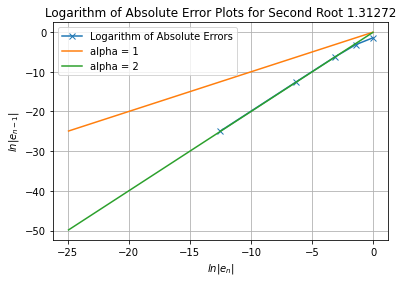

In [60]:
# Calculate the absolute error in the iteration n
er=np.zeros(len(r2))
for i in range(0,len(r2)-1):
    er[i]=np.abs(r2[i+1]-r2[i])

# Calculate error in the previous iteration
erp=np.zeros(len(r2))
for i in range(0,len(r2)-1):
    erp[i]=er[i+1]
    
# Take logarithm of the absolute errors
# Create empty lists to store the logarithm of the error
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)      

# For plotting alpha = 2
erSquared = []
for i in range(0,len(er)):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)

plt.plot(erNew, erpNew, marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title(f'Logarithm of Absolute Error Plots for Second Root {r2[-1]:.5f}')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

* The order of convergence is quadratic.

In [61]:
erNew,erpNew

([-0.0344275072387406,
  -1.4324862650751056,
  -3.159035436170985,
  -6.2887726479513955,
  -12.500853147439154,
  -24.92311887276782,
  None],
 [-1.4324862650751056,
  -3.159035436170985,
  -6.2887726479513955,
  -12.500853147439154,
  -24.92311887276782,
  None,
  None])

In [62]:
# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
slope

1.9996949051695312

$\pagebreak$

# Problem 5

The function $f(x) = 81x^4 + 27x^3 - 9x^2 +3x -22$ has a zero at x = 2/3. Using starting value of $p_0 = 0$. 

Perform ten iterations of Newton’s method to approximate the solution.

* a) Plot Absolute error versus Iteration number.

* b) What is the order of convergence?

* c) What is the multiplicity of the zero at $x = 2/3$

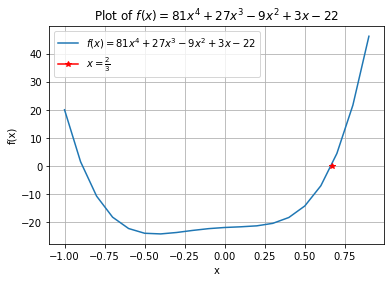

In [63]:
# Encode the equation in a function
def f(x):
    return 81*x**4 + 27*x**3 - 9*x**2 + 3*x - 22

# Encode derivative for the equation in a function
def df1(x):
    return 324*x**3 + 81*x**2 - 18*x + 3

# Actual root
p = 2/3

# Plot the equation
t = np.arange(-1, 1, 0.1)
s = f(t)  
plt.plot(t, s, label = r'$f(x) = 81x^4 + 27x^3 - 9x^2 +3x -22$')
plt.title(r'Plot of $f(x) = 81x^4 + 27x^3 - 9x^2 +3x -22$')
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot p on the existing plot
plt.plot(p, f(p), label = r'$x = \frac{2}{3}$', marker = '*', c='r')

plt.legend()
plt.grid(True) 
plt.show()   

### Perform ten iterations of Newton’s method to approximate the solution.

In [64]:
# Encode Newton's Method
def g(x,f,df1):
    return x-f(x)/df1(x)

# Since 10 iterations of Newton's method is required
Nmax = 11
xn = np.zeros(Nmax)
xn[0] = 0 # Initial guess

# Calculate approximate roots
for i in range(1,Nmax):
    xn[i]=g(xn[i-1],f,df1)
print(xn)

[0.         7.33333333 5.48170875 4.09392354 3.0545     2.27726437
 1.69856166 1.27285239 0.97068439 0.77793893 0.68733454]


* The last approximated value is close to the actual root of 2/3

### Plot the approximations

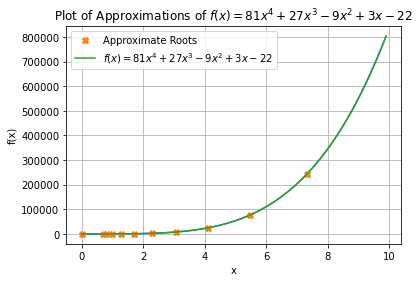

In [65]:
t = np.arange(0, 10, 0.1)  
s = f(t)  
fn = f(xn) 
plt.plot(t, s)  
plt.plot(xn, fn,"X", label = 'Approximate Roots')  
plt.plot(t, s, label = r'$f(x) = 81x^4 + 27x^3 - 9x^2 +3x -22$') 
#plt.plot(p, f(p), label = r'$x = \frac{2}{3}$', marker = '*', c='r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(r'Plot of Approximations of $f(x) = 81x^4 + 27x^3 - 9x^2 +3x -22$')
plt.grid(True)
plt.show() 

## 5.a) Plot Absolute error versus Iteration number.

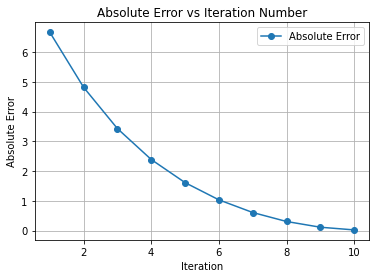

In [66]:
# Actual root p is
p0 = 2/3
abs_err = [] #e_n

for idx in range(len(xn)-1):
    e = abs(xn[idx+1] - p0)
    abs_err.append(e)

itr = np.arange(1,len(abs_err)+1)
# Plot the function
plt.plot(itr,abs_err, '-o', label = 'Absolute Error')
plt.title('Absolute Error vs Iteration Number')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)

In [67]:
abs_err

[6.666666666666666,
 4.815042082376915,
 3.4272568756259942,
 2.3878333364194146,
 1.6105977047305133,
 1.0318949915467615,
 0.6061857257183475,
 0.30401772188740006,
 0.11127226775053212,
 0.02066787252187774]

In [68]:
xn

array([0.        , 7.33333333, 5.48170875, 4.09392354, 3.0545    ,
       2.27726437, 1.69856166, 1.27285239, 0.97068439, 0.77793893,
       0.68733454])

In [69]:
# Verify if errors are correctly calculated
abs(xn[1]-(2/3))

6.666666666666666

In [70]:
# Verify if errors are correctly calculated
abs(xn[5]-(2/3))

1.6105977047305133

In [71]:
# Verify if errors are correctly calculated
abs(xn[-1]-(2/3))

0.02066787252187774

$\pagebreak$

## 5.b) What is the order of convergence?

In [72]:
# Actual root p is
p0 = 2/3
abs_err2 = [] # e_{n-1}

for idx in range(len(xn)):
    e = abs(xn[idx] - p0) 
    abs_err2.append(e)
abs_err2

[0.6666666666666666,
 6.666666666666666,
 4.815042082376915,
 3.4272568756259942,
 2.3878333364194146,
 1.6105977047305133,
 1.0318949915467615,
 0.6061857257183475,
 0.30401772188740006,
 0.11127226775053212,
 0.02066787252187774]

In [73]:
# Verify if errors are correctly calculated
abs(xn[0]-(2/3))

0.6666666666666666

In [74]:
# Verify if errors are correctly calculated
abs(xn[-1]-(2/3))

0.02066787252187774

In [75]:
import pandas as pd

err_comp = pd.DataFrame(list(zip(abs_err, abs_err2)),
               columns =['|p_n - p|', '|p_{n-1} - p|',])

err_comp

,|p_n - p|,|p_{n-1} - p|
0,6.666667,0.666667
1,4.815042,6.666667
2,3.427257,4.815042
3,2.387833,3.427257
4,1.610598,2.387833
5,1.031895,1.610598
6,0.606186,1.031895
7,0.304018,0.606186
8,0.111272,0.304018
9,0.020668,0.111272


In [76]:
ratio1 = err_comp.iloc[:,0]/err_comp.iloc[:,1]**2
ratio1

0    15.000000
1     0.108338
2     0.147825
3     0.203288
4     0.282474
5     0.397797
6     0.569291
7     0.827347
8     1.203896
9     1.669252
dtype: float64

In [77]:
# Encode second derivative for the equation in a function
def df2(x):
    return 972*x**2 + 162*x - 18

p = 2/3

ratio2 = df2(p)/(2*df1(p))
ratio2

2.1219512195121957

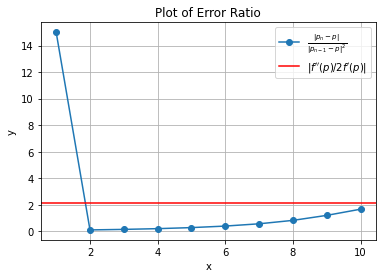

In [78]:
x_axis = np.linspace(1,10,10)
plt.plot(x_axis, ratio1, label = r'$\frac{|p_n - p|}{|p_{n-1} - p|^2}$', marker = 'o')
plt.axhline(y=ratio2, c = 'r', label = r"$|f''(p) / 2f'(p)|$")
#plt.plot(ratio2, label = r"$|f''(p) / 2f'(p)|$", marker = '*', c = 'r')
plt.legend()
plt.title(r"Plot of Error Ratio")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

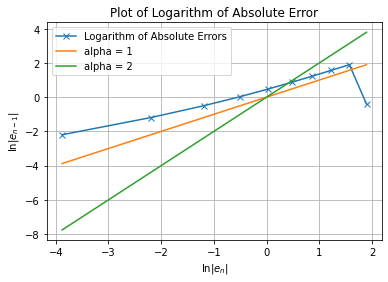

In [79]:
erSquared = []
for i in range(0,len(abs_err)):
    if (abs_err[i] * abs_err[i]) != 0:
        item = np.log(abs_err[i]*abs_err[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)
        
erNew=[]
erpNew=[]

for i in abs_err:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in abs_err2:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)
        
plt.plot(erNew, erpNew[0:10], marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title('Plot of Logarithm of Absolute Error')
plt.xlabel(r'ln$|e_n|$')
plt.ylabel(r'ln$|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

In [80]:
erNew,erpNew

([1.8971199848858813,
  1.5717447850617232,
  1.2317601964959843,
  0.8703864009755993,
  0.47660535527616443,
  0.031396909505077536,
  -0.5005688617845551,
  -1.1906692835928057,
  -2.1957752184096937,
  -3.87917483647453],
 [-0.40546510810816444,
  1.8971199848858813,
  1.5717447850617232,
  1.2317601964959843,
  0.8703864009755993,
  0.47660535527616443,
  0.031396909505077536,
  -0.5005688617845551,
  -1.1906692835928057,
  -2.1957752184096937,
  -3.87917483647453])

In [81]:
# Order of convergence from log plots
slope = (erpNew[-1]-erpNew[-2])/(erNew[-1] - erNew[-2])
slope

1.0

In [82]:
# Order of convergence from log plots
slope = (erpNew[-5]-erpNew[-6])/(erNew[-5] - erNew[-6])
slope

1.0

* From the logarithm of absolute errors, the order of convergence is coming to be equal to 1.
* However, Newton's method is quadratically convergent.
* So we use root approximations to calculate the log of errors and check.

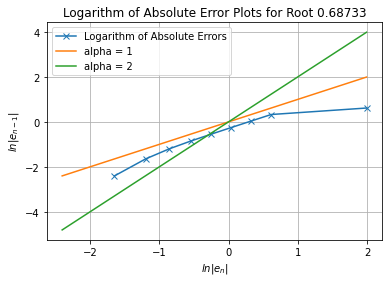

In [83]:
# Calculate the absolute error in the iteration n
er=np.zeros(len(xn))
for i in range(0,len(xn)-1):
    er[i]=np.abs(xn[i+1]-xn[i])

# Calculate error in the previous iteration
erp=np.zeros(len(xn))
for i in range(0,len(xn)-1):
    erp[i]=er[i+1]
    
# Take logarithm of the absolute errors
# Create empty lists to store the logarithm of the error
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)      

# For plotting alpha = 2
erSquared = []
for i in range(0,len(er)):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)

plt.plot(erNew, erpNew, marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title(f'Logarithm of Absolute Error Plots for Root {xn[-1]:.5f}')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

In [84]:
er,erp

(array([7.33333333, 1.85162458, 1.38778521, 1.03942354, 0.77723563,
        0.57870271, 0.42570927, 0.302168  , 0.19274545, 0.0906044 ,
        0.        ]),
 array([1.85162458, 1.38778521, 1.03942354, 0.77723563, 0.57870271,
        0.42570927, 0.302168  , 0.19274545, 0.0906044 , 0.        ,
        0.        ]))

In [85]:
erNew,erpNew

([1.992430164690206,
  0.6160634074090169,
  0.3277090999301168,
  0.038666270253776856,
  -0.2520117163011153,
  -0.5469663820018058,
  -0.8539986402857446,
  -1.1967721122110317,
  -1.646384851061335,
  -2.401252554652341,
  None],
 [0.6160634074090169,
  0.3277090999301168,
  0.038666270253776856,
  -0.2520117163011153,
  -0.5469663820018058,
  -0.8539986402857446,
  -1.1967721122110317,
  -1.646384851061335,
  -2.401252554652341,
  None,
  None])

In [86]:
# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
slope

1.6789286387242155

In [87]:
# Order of convergence from log plots
slope = (erpNew[-4]-erpNew[-3])/(erNew[-4] - erNew[-3])
slope

1.6789286387242155

* If approximations are used to calculate the log of errors then we get order of convergence as 1.617.

$\pagebreak$

## 5.c) What is the multiplicity of the zero at $x = 2/3$

In [88]:
# Check f(x*) = 0
round(f(2/3))

0

In [89]:
# Check f'(x*)
round(df1(2/3))

123

* The first derivative is not zero, thus the multiplicity of the zero x = 2/3 is 1.

$\pagebreak$

# Problem 6

It was observed that Newton’s method provides quadratic convergence towards roots of multiplicity equal to one. How does the secant method perform under such circumstances? Each of the following functions has a zero at the specified location. 

Perform 25 iterations applying the secant method. 

Does the sequence generated by the secant method converge with $\alpha = 1.618$ or has the order dropped to $\alpha = 1$?
* (a) $f(x) = x^2(1-cos(x)) $ has a zero at x = 0. Use $p_0 = -1$ and $p_1 = 2.5$.
* (b) $f(x) = 81x^4 + 27x^3 - 9x^2 + 3x - 22$ has a zero at x = 2/3. Use $p_0 = 0$ and $p_1 = 0.5$

## 6.(a) $f(x) = x^2(1-cos(x))$ has a zero at x = 0. Use $p_0 = -1$ and $p_1 = 2.5$.

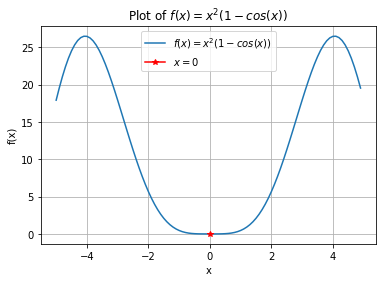

In [90]:
def f(x):
    return (x**2)*(1-np.cos(x))

t = np.arange(-5, 5, 0.1)  
s = f(t)  
plt.plot(t, s, label = r'$f(x) = x^2(1-cos(x))$')
plt.title(r'Plot of $f(x) = x^2(1-cos(x))$')
plt.grid(True) 
plt.xlabel('x')
plt.ylabel('f(x)')

# Actual root
p = 0
# Plot p on the existing plot
plt.plot(p, f(p), label = r'$x = 0$', marker = '*', c='r')


plt.legend()
plt.grid(True) 
plt.show()   

### Perform 25 iterations applying the secant method. 

In [91]:
Nmax=27 # Since 25 iterations are required and 2 initial guesses are already provided
xn=np.zeros(Nmax)
xn[0]=-1
xn[1]=2.5
print (xn)

[-1.   2.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]


In [92]:
for i in range(1,Nmax-1):
    xn[i+1]=xn[i]-f(xn[i])*(xn[i]-xn[i-1])/(f(xn[i])-f(xn[i-1]))
print(xn)

[-1.          2.5        -1.14901129 -1.42057452 -0.92285151 -0.80093228
 -0.63427957 -0.52257333 -0.42518275 -0.34815127 -0.28466976 -0.23304701
 -0.19078109 -0.15622832 -0.12794374 -0.10479061 -0.0858316  -0.07030553
 -0.05758938 -0.04717401 -0.03864276 -0.03165459 -0.0259303  -0.02124124
 -0.01740016 -0.01425369 -0.0116762 ]


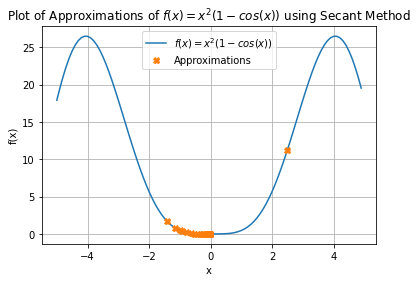

In [93]:
t = np.arange(-5, 5, 0.1)  
s = f(t)  
fn= f(xn)
plt.plot(t, s, label = r'$f(x) = x^2(1-cos(x))$')  
plt.title(r'Plot of Approximations of $f(x) = x^2(1-cos(x))$ using Secant Method')
plt.plot(xn, fn,"X", label = 'Approximations') 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True) 
plt.legend()
plt.show() 

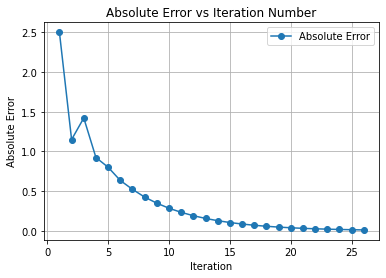

In [94]:
# Actual root p is
p0 = 0
abs_err = [] #e_n

for idx in range(len(xn)-1):
    e = abs(xn[idx+1] - p0)
    abs_err.append(e)

itr = np.arange(1,len(abs_err)+1)
# Plot the function
plt.plot(itr,abs_err, '-o', label = 'Absolute Error')
plt.title('Absolute Error vs Iteration Number')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)

In [95]:
abs_err

[2.5,
 1.1490112891386546,
 1.4205745154798353,
 0.9228515091150911,
 0.800932283272223,
 0.6342795734897799,
 0.5225733315815044,
 0.4251827542968706,
 0.34815127455782413,
 0.2846697607775732,
 0.23304700896497058,
 0.1907810899857577,
 0.15622832109827584,
 0.1279437367228983,
 0.10479060628952891,
 0.08583159533127724,
 0.07030553495727299,
 0.0575893788468837,
 0.04717401079343529,
 0.03864275527457339,
 0.03165459093033998,
 0.025930299927435414,
 0.02124124020467184,
 0.01740015831206268,
 0.01425368645960166,
 0.011676203444685338]

In [96]:
# Calculate error at iteration n
er=np.zeros(Nmax)
for i in range(0,Nmax-1):
    er[i]=np.abs(xn[i+1]-xn[i])
    #er[i]=np.abs(xn[i+1])-np.abs(xn[i])
    
print(er)

[3.50000000e+00 3.64901129e+00 2.71563226e-01 4.97723006e-01
 1.21919226e-01 1.66652710e-01 1.11706242e-01 9.73905773e-02
 7.70314797e-02 6.34815138e-02 5.16227518e-02 4.22659190e-02
 3.45527689e-02 2.82845844e-02 2.31531304e-02 1.89590110e-02
 1.55260604e-02 1.27161561e-02 1.04153681e-02 8.53125552e-03
 6.98816434e-03 5.72429100e-03 4.68905972e-03 3.84108189e-03
 3.14647185e-03 2.57748301e-03 0.00000000e+00]


In [97]:
# Calculate error at previous iteration
erp=np.zeros(Nmax)
for i in range(0,Nmax-1):
    erp[i]=er[i+1]

print(erp)

[3.64901129e+00 2.71563226e-01 4.97723006e-01 1.21919226e-01
 1.66652710e-01 1.11706242e-01 9.73905773e-02 7.70314797e-02
 6.34815138e-02 5.16227518e-02 4.22659190e-02 3.45527689e-02
 2.82845844e-02 2.31531304e-02 1.89590110e-02 1.55260604e-02
 1.27161561e-02 1.04153681e-02 8.53125552e-03 6.98816434e-03
 5.72429100e-03 4.68905972e-03 3.84108189e-03 3.14647185e-03
 2.57748301e-03 0.00000000e+00 0.00000000e+00]


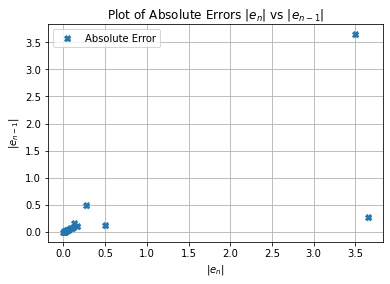

In [98]:
# Plot graph of absolute errors
plt.plot(er, erp,"X",label = 'Absolute Error')
plt.title(r'Plot of Absolute Errors $|e_n|$ vs $|e_{n-1}|$')
plt.xlabel(r'$|e_n|$')
plt.ylabel(r'$|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show() 

In [99]:
erSquared = []
for i in range(0,Nmax):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)

#erSquared = [i for i in erSquared if i is not None]
print(erSquared)

[2.505525936990736, 2.588912502423662, -2.6071205777038395, -1.3954231376396302, -4.208793073555938, -3.583686428079791, -4.38376538692623, -4.6580516309421185, -5.127082225791872, -5.5140130740769076, -5.927585554146725, -6.327548431139689, -6.730535181036976, -7.130876688931655, -7.531250567376353, -7.930951896330114, -8.33047070486386, -8.729763918637996, -9.128945732216698, -9.528037479395099, -9.927074737845121, -10.32607315899667, -10.725046404350682, -11.124002418395202, -11.522947001407177, -11.921883863692113, None]


In [100]:
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)
        
erNew, erpNew

([1.252762968495368,
  1.294456251211831,
  -1.3035602888519198,
  -0.6977115688198151,
  -2.104396536777969,
  -1.7918432140398954,
  -2.191882693463115,
  -2.329025815471059,
  -2.5635411128959356,
  -2.7570065370384538,
  -2.9637927770733623,
  -3.1637742155698443,
  -3.365267590518488,
  -3.5654383444658273,
  -3.7656252836881765,
  -3.965475948165057,
  -4.16523535243193,
  -4.364881959318998,
  -4.564472866108349,
  -4.7640187396975495,
  -4.963537368922561,
  -5.163036579498335,
  -5.362523202175341,
  -5.562001209197601,
  -5.761473500703588,
  -5.960941931846056,
  None],
 [1.294456251211831,
  -1.3035602888519198,
  -0.6977115688198151,
  -2.104396536777969,
  -1.7918432140398954,
  -2.191882693463115,
  -2.329025815471059,
  -2.5635411128959356,
  -2.7570065370384538,
  -2.9637927770733623,
  -3.1637742155698443,
  -3.365267590518488,
  -3.5654383444658273,
  -3.7656252836881765,
  -3.965475948165057,
  -4.16523535243193,
  -4.364881959318998,
  -4.564472866108349,
  -4.7640

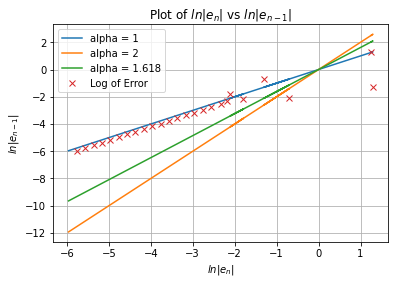

In [101]:
#plt.plot(er, erp, "X", label = 'Log of Error')
plt.plot(erNew, erNew, label = 'alpha = 1')
plt.plot(erNew, erSquared, label = 'alpha = 2')
y_temp = [i for i in erNew if i is not None]
y_temp = np.array(y_temp)
y_temp_1 = 1.618*y_temp
plt.plot(y_temp, y_temp_1, label = 'alpha = 1.618')
plt.plot(erNew, erpNew, "x", label = 'Log of Error')

plt.title(r'Plot of $ln|e_n|$ vs $ln|e_{n-1}|$')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
erNew,erpNew

([1.252762968495368,
  1.294456251211831,
  -1.3035602888519198,
  -0.6977115688198151,
  -2.104396536777969,
  -1.7918432140398954,
  -2.191882693463115,
  -2.329025815471059,
  -2.5635411128959356,
  -2.7570065370384538,
  -2.9637927770733623,
  -3.1637742155698443,
  -3.365267590518488,
  -3.5654383444658273,
  -3.7656252836881765,
  -3.965475948165057,
  -4.16523535243193,
  -4.364881959318998,
  -4.564472866108349,
  -4.7640187396975495,
  -4.963537368922561,
  -5.163036579498335,
  -5.362523202175341,
  -5.562001209197601,
  -5.761473500703588,
  -5.960941931846056,
  None],
 [1.294456251211831,
  -1.3035602888519198,
  -0.6977115688198151,
  -2.104396536777969,
  -1.7918432140398954,
  -2.191882693463115,
  -2.329025815471059,
  -2.5635411128959356,
  -2.7570065370384538,
  -2.9637927770733623,
  -3.1637742155698443,
  -3.365267590518488,
  -3.5654383444658273,
  -3.7656252836881765,
  -3.965475948165057,
  -4.16523535243193,
  -4.364881959318998,
  -4.564472866108349,
  -4.7640

In [103]:
# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
slope

0.999980647119004

* The order of convergence is $\alpha = 1$.

$\pagebreak$

## 6.(b) $f(x) = 81x^4 + 27x^3 - 9x^2 + 3x - 22$ has a zero at x = 2/3. Use $p_0 = 0$ and $p_1 = 0.5$

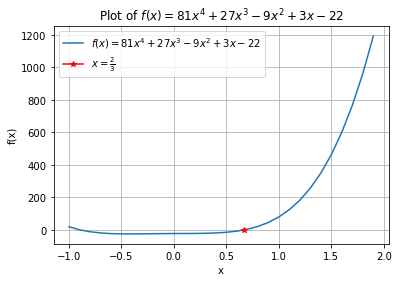

In [104]:
# Encode the equation in a function
def f(x):
    return 81*x**4 + 27*x**3 - 9*x**2 + 3*x - 22

# Actual root
p = 2/3

# Plot the equation
t = np.arange(-1, 2, 0.1)
s = f(t)  
plt.plot(t, s, label = r'$f(x) = 81x^4 + 27x^3 - 9x^2 +3x -22$')
plt.title(r'Plot of $f(x) = 81x^4 + 27x^3 - 9x^2 +3x -22$')
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot p on the existing plot
plt.plot(p, f(p), label = r'$x = \frac{2}{3}$', marker = '*', c='r')

plt.legend()
plt.grid(True) 
plt.show()   

### Perform 25 iterations applying the secant method. 

In [105]:
Nmax=27 # Since 25 iterations are required and 2 initial guesses are already provided
xn=np.zeros(Nmax)
xn[0]=0
xn[1]=0.5
print (xn)

[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [106]:
for i in range(1,Nmax-1):
    xn[i+1]=xn[i]-f(xn[i])*(xn[i]-xn[i-1])/(f(xn[i])-f(xn[i-1]))
print(xn)

[0.         0.5        1.43089431 0.53357389 0.56151619 0.70758242
 0.65688365 0.6658486  0.66668387 0.66666664 0.66666667 0.66666667
 0.66666667 0.66666667        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]


<ipython-input-106-76f0fa6581e3>:2: RuntimeWarning: invalid value encountered in double_scalars
  xn[i+1]=xn[i]-f(xn[i])*(xn[i]-xn[i-1])/(f(xn[i])-f(xn[i-1]))


* Only 14 iterations are being performed as the for loop is encountering a division by 0 as the approximations get smaller.

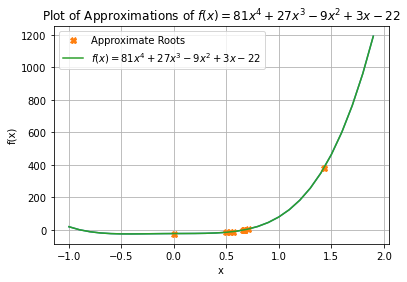

In [107]:
t = np.arange(-1, 2, 0.1)  
s = f(t)  
fn = f(xn) 
plt.plot(t, s)  
plt.plot(xn, fn,"X", label = 'Approximate Roots')  
plt.plot(t, s, label = r'$f(x) = 81x^4 + 27x^3 - 9x^2 +3x -22$') 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(r'Plot of Approximations of $f(x) = 81x^4 + 27x^3 - 9x^2 +3x -22$')
plt.grid(True)
plt.show() 

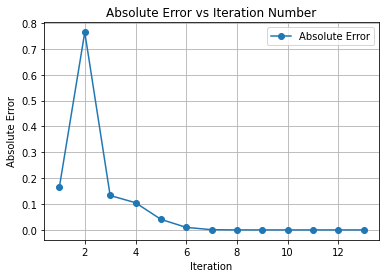

In [108]:
# Actual root p is
p0 = 2/3
abs_err = [] #e_n

for idx in range(len(xn)-1):
    e = abs(xn[idx+1] - p0)
    abs_err.append(e)

itr = np.arange(1,len(abs_err)+1)
# Plot the function
plt.plot(itr,abs_err, '-o', label = 'Absolute Error')
plt.title('Absolute Error vs Iteration Number')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)

In [109]:
abs_err

[0.16666666666666663,
 0.7642276422764228,
 0.13309277585896595,
 0.10515047690453838,
 0.04091574943651477,
 0.009783021275799997,
 0.0008180681272663692,
 1.7198635927528905e-05,
 2.9883614138803694e-08,
 1.0905720770892913e-12,
 0.0,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [110]:
er=np.zeros(Nmax)
for i in range(0,Nmax-1):
    er[i]=np.abs(xn[i+1]-xn[i])
    
erp=np.zeros(Nmax)
for i in range(0,Nmax-1):
    erp[i]=er[i+1]

erSquared = []
for i in range(0,Nmax):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)
        
er,erp

(array([5.00000000e-01, 9.30894309e-01, 8.97320418e-01, 2.79422990e-02,
        1.46066226e-01, 5.06987707e-02, 8.96495315e-03, 8.35266763e-04,
        1.72285195e-05, 2.98825236e-08, 1.09057208e-12, 1.11022302e-16,
        0.00000000e+00,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan, 0.00000000e+00]),
 array([9.30894309e-01, 8.97320418e-01, 2.79422990e-02, 1.46066226e-01,
        5.06987707e-02, 8.96495315e-03, 8.35266763e-04, 1.72285195e-05,
        2.98825236e-08, 1.09057208e-12, 1.11022302e-16, 0.00000000e+00,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan, 0.00000000e+00, 0.00000000e+00]))

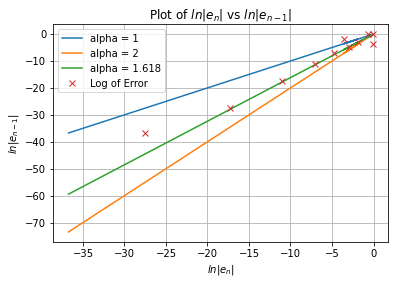

In [111]:
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)
        
#plt.plot(er, erp, "X", label = 'Log of Error')
plt.plot(erNew, erNew, label = 'alpha = 1')
plt.plot(erNew, erSquared, label = 'alpha = 2')
y_temp = [i for i in erNew if i is not None]
y_temp = np.array(y_temp)
y_temp_1 = 1.618*y_temp
plt.plot(y_temp, y_temp_1, label = 'alpha = 1.618')
plt.plot(erNew, erpNew, "x", label = 'Log of Error')

plt.title(r'Plot of $ln|e_n|$ vs $ln|e_{n-1}|$')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True)
plt.show()

In [112]:
erNew,erpNew

([-0.6931471805599453,
  -0.07160953237812315,
  -0.10834226985467232,
  -3.5776136467048008,
  -1.9236951550457762,
  -2.9818536149843746,
  -4.714432397980679,
  -7.08775940725637,
  -10.9689444344087,
  -17.325992023530304,
  -27.54431871600223,
  -36.7368005696771,
  None,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  None],
 [-0.07160953237812315,
  -0.10834226985467232,
  -3.5776136467048008,
  -1.9236951550457762,
  -2.9818536149843746,
  -4.714432397980679,
  -7.08775940725637,
  -10.9689444344087,
  -17.325992023530304,
  -27.54431871600223,
  -36.7368005696771,
  None,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  None,
  None])

In [113]:
# Order of convergence from log plots
slope = (erpNew[10]-erpNew[9])/(erNew[10] - erNew[9])
slope

0.8996073555220329

In [114]:
# Order of convergence from log plots
slope = (erpNew[9]-erpNew[8])/(erNew[9] - erNew[8])
slope

1.6074013210091227

In [115]:
# Order of convergence from log plots
slope = (erpNew[8]-erpNew[7])/(erNew[8] - erNew[7])
slope

1.6379140764092466

In [116]:
# Order of convergence from log plots
slope = (erpNew[7]-erpNew[6])/(erNew[7] - erNew[6])
slope

1.635335127432278

* Because the number of approximations generated are small, the slope calculation is not accurate.
* The last values of the log of errors are not linear and this the slope is coming less than 1.
* However, when slopes of previous points is calculated then the slope is coming close to 1.618.
* The function converges at $\alpha = 1.618$.
* The order of convergence is superlinear.
* This is the same order as obtained using Newton's method.

$\pagebreak$

# Problem 7

* a) Verify that the equation $x^4 - 18x^2 + 45 = 0$ has a root on the interval (1,2). Perform four iterations of the Newton’s method, using the starting value $p_0 = 1$. Given that the exact value of the root is $x = \sqrt{3}$ , compute the absolute error in the approximations just obtained. What is the apparent order of convergence?
* b) Verify that the equation $x^4 - 18x^2 + 45 = 0$ also has a root on the interval (3,4). Perform four iterations of the secant method, using the starting values $p_0 = 3$ and $p_1 = 4$. Compute the absolute error in each approximation, given the exact value of the root, $x = \sqrt{15}$ . What is the order of convergence?
* c) Explain clearly the difference in the convergence behavior between parts a) and b)?

## 7.a) Verify that the equation $x^4 - 18x^2 + 45 = 0$ has a root on the interval (1,2). Perform four iterations of the Newton’s method, using the starting value $p_0 = 1$. Given that the exact value of the root is $x = \sqrt{3}$ , compute the absolute error in the approximations just obtained. What is the apparent order of convergence?

### Plot the equation

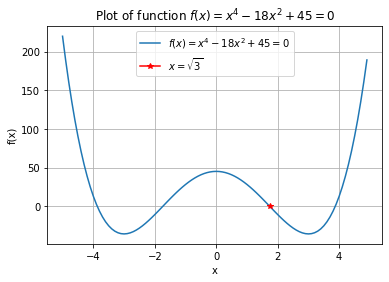

In [117]:
# Encode the equation in a function
def f(x):
    return x**4 - 18*x**2 + 45

# Encode derivative for the equation in a function
def df1(x):
    return 4*x**3 - 36*x

# Actual root
p = 3**(1/2)

# Plot the equation
t = np.arange(-5, 5, 0.1)
s = f(t)  
plt.plot(t, s, label = r'$f(x) = x^4 - 18x^2 + 45 = 0$')
plt.title(r'Plot of function $f(x) = x^4 - 18x^2 + 45 = 0$')
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot p on the existing plot
plt.plot(p, f(p), label = r'$x = \sqrt{3}$', marker = '*', c='r')

plt.legend()
plt.grid(True) 
plt.show()   

* The function $f(x) = x^4 - 18x^2 + 45 = 0$ has a root in the interval (1,2) as the line intersects the x-axis near 2.

### Perform four iterations of the Newton’s method, using the starting value $p_0 = 1$.

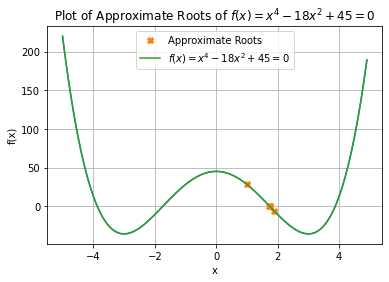

In [118]:
# Encode Newton's Method
def g(x,f,df1):
    return x-f(x)/df1(x)

# Since 4 iterations of Newton's method is required
Nmax = 5
xn = np.zeros(Nmax)
xn[0] = 1 # Initial guess

# Calculate approximate roots
for i in range(1,Nmax):
    xn[i]=g(xn[i-1],f,df1)

t = np.arange(-5, 5, 0.1)  
s = f(t)  
fn = f(xn) 
plt.plot(t, s)  
plt.plot(xn, fn,"X", label = 'Approximate Roots') 
plt.title(r'Plot of Approximate Roots of $f(x) = x^4 - 18x^2 + 45 = 0$')
plt.plot(t, s, label = r'$f(x) = x^4 - 18x^2 + 45 = 0$') 
#plt.plot(p, f(p), label = r'$x = \frac{2}{3}$', marker = '*', c='r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show() 

In [119]:
xn

array([1.        , 1.875     , 1.73103632, 1.73205081, 1.73205081])

* The last approximated root is within the interval (1,2).

### Given that the exact value of the root is $x = \sqrt{3}$ , compute the absolute error in the approximations just obtained. What is the apparent order of convergence?

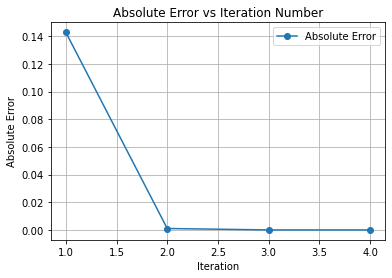

In [120]:
# Actual root p is
p0 = 3**(1/2)
abs_err = [] #e_n

for idx in range(len(xn)-1):
    e = abs(xn[idx+1] - p0)
    abs_err.append(e)

itr = np.arange(1,len(abs_err)+1)
# Plot the function
plt.plot(itr,abs_err, '-o', label = 'Absolute Error')
plt.title('Absolute Error vs Iteration Number')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)

In [121]:
abs_err

[0.1429491924311228, 0.0010144827825524505, 3.479505572556718e-10, 0.0]

In [122]:
# Verify absolute errors
abs(xn[1]-3**(1/2))

0.1429491924311228

In [123]:
# Verify absolute errors
abs(xn[4]-3**(1/2))

0.0

### Order of Convergence

In [124]:
# Actual root p is
p0 = 3**(1/2)
abs_err2 = [] # e_{n-1}

for idx in range(len(xn)):
    e = abs(xn[idx] - p0) 
    abs_err2.append(e)
abs_err2

[0.7320508075688772,
 0.1429491924311228,
 0.0010144827825524505,
 3.479505572556718e-10,
 0.0]

In [125]:
# Verify absolute errors
abs(xn[0]-3**(1/2))

0.7320508075688772

In [126]:
erSquared = []
for i in range(0,len(abs_err)):
    if (abs_err[i] * abs_err[i]) != 0:
        item = np.log(abs_err[i]*abs_err[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)
        
erNew=[]
erpNew=[]

for i in abs_err:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in abs_err2:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)
        
erNew, erpNew

([-1.9452660095398624, -6.893376370205209, -21.778960723099463, None],
 [-0.3119053581824358,
  -1.9452660095398624,
  -6.893376370205209,
  -21.778960723099463,
  None])

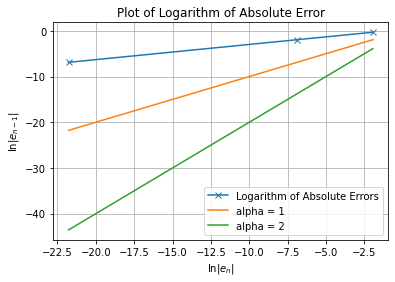

In [127]:
plt.plot(erNew, erpNew[0:-1], marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title('Plot of Logarithm of Absolute Error')
plt.xlabel(r'ln$|e_n|$')
plt.ylabel(r'ln$|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

In [128]:
erNew,erpNew

([-1.9452660095398624, -6.893376370205209, -21.778960723099463, None],
 [-0.3119053581824358,
  -1.9452660095398624,
  -6.893376370205209,
  -21.778960723099463,
  None])

In [129]:
# Order of convergence from log plots
slope = (erpNew[-2]-erpNew[-3])/(erNew[-2] - erNew[-3])
slope

1.0

In [130]:
# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
slope

1.0

* The order of convergence seems to be linear.
* But Newton's method converges quadratically.
* Log of absolute errors is not evaluating the order properly.

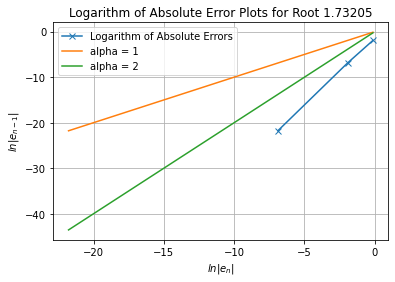

In [131]:
# Calculate the absolute error in the iteration n
er=np.zeros(len(xn))
for i in range(0,len(xn)-1):
    er[i]=np.abs(xn[i+1]-xn[i])

# Calculate error in the previous iteration
erp=np.zeros(len(xn))
for i in range(0,len(xn)-1):
    erp[i]=er[i+1]
    
# Take logarithm of the absolute errors
# Create empty lists to store the logarithm of the error
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)      

# For plotting alpha = 2
erSquared = []
for i in range(0,len(er)):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)

plt.plot(erNew, erpNew, marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title(f'Logarithm of Absolute Error Plots for Root {xn[-1]:.5f}')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

In [132]:
er,erp

(array([8.75000000e-01, 1.43963675e-01, 1.01448313e-03, 3.47950557e-10,
        0.00000000e+00]),
 array([1.43963675e-01, 1.01448313e-03, 3.47950557e-10, 0.00000000e+00,
        0.00000000e+00]))

In [133]:
# Verify absolute errors
abs(xn[2]-xn[1])

0.14396367521367526

In [134]:
abs_err,abs_err2

([0.1429491924311228, 0.0010144827825524505, 3.479505572556718e-10, 0.0],
 [0.7320508075688772,
  0.1429491924311228,
  0.0010144827825524505,
  3.479505572556718e-10,
  0.0])

In [135]:
erNew, erpNew

([-0.13353139262452263,
  -1.9381942666884853,
  -6.893376027222062,
  -21.778960723099463,
  None],
 [-1.9381942666884853, -6.893376027222062, -21.778960723099463, None, None])

In [136]:
slope = (erpNew[1]-erpNew[0])/(erNew[1]-erNew[0])
slope

2.7457658888803356

* With log of absolute error calculated from approximated roots, the order is coming equal to 2.74.

$\pagebreak$

## 7.b) Verify that the equation $x^4 - 18x^2 + 45 = 0$ also has a root on the interval (3,4). Perform four iterations of the secant method, using the starting values $p_0 = 3$ and $p_1 = 4$. Compute the absolute error in each approximation, given the exact value of the root, $x = \sqrt{15}$ . What is the order of convergence?

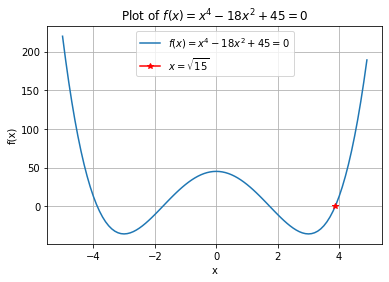

In [137]:
# Encode the equation in a function
def f(x):
    return x**4 - 18*x**2 + 45

# Actual root
p = 15**(1/2)

# Plot the equation
t = np.arange(-5, 5, 0.1)
s = f(t)  
plt.plot(t, s, label = r'$f(x) = x^4 - 18x^2 + 45 = 0$')
plt.title(r'Plot of $f(x) = x^4 - 18x^2 + 45 = 0$')
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot p on the existing plot
plt.plot(p, f(p), label = r'$x = \sqrt{15}$', marker = '*', c='r')

plt.legend()
plt.grid(True) 
plt.show()   

In [138]:
Nmax=6 # Since 4 iterations are required and 2 initial guesses are already provided
xn=np.zeros(Nmax)
xn[0]=3
xn[1]=4

for i in range(1,Nmax-1):
    xn[i+1]=xn[i]-f(xn[i])*(xn[i]-xn[i-1])/(f(xn[i])-f(xn[i-1]))
print(xn)

[3.         4.         3.73469388 3.85932813 3.87458114 3.87296633]


* The last root approximation is between the interval (3,4)

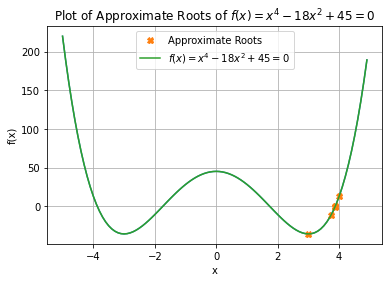

In [139]:
t = np.arange(-5, 5, 0.1)  
s = f(t)  
fn = f(xn) 
plt.plot(t, s)  
plt.plot(xn, fn,"X", label = 'Approximate Roots') 
plt.title(r'Plot of Approximate Roots of $f(x) = x^4 - 18x^2 + 45 = 0$')
plt.plot(t, s, label = r'$f(x) = x^4 - 18x^2 + 45 = 0$') 
#plt.plot(p, f(p), label = r'$x = \frac{2}{3}$', marker = '*', c='r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show() 

### Given that the exact value of the root is $x = \sqrt{15}$ , compute the absolute error in the approximations just obtained. What is the apparent order of convergence?

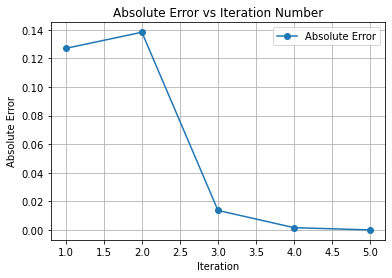

In [140]:
# Actual root p is
p0 = 15**(1/2)
abs_err = [] #e_n

for idx in range(len(xn)-1):
    e = abs(xn[idx+1] - p0)
    abs_err.append(e)

itr = np.arange(1,len(abs_err)+1)
# Plot the function
plt.plot(itr,abs_err, '-o', label = 'Absolute Error')
plt.title('Absolute Error vs Iteration Number')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)

In [141]:
xn

array([3.        , 4.        , 3.73469388, 3.85932813, 3.87458114,
       3.87296633])

In [142]:
abs_err

[0.12701665379258298,
 0.13828946865639669,
 0.013655212413626217,
 0.0015977950841121746,
 1.70149630789318e-05]

### Order of Convergence

In [143]:
# Actual root p is
p0 = 15**(1/2)
abs_err2 = [] # e_{n-1}

for idx in range(len(xn)):
    e = abs(xn[idx] - p0) 
    abs_err2.append(e)
abs_err2

[0.872983346207417,
 0.12701665379258298,
 0.13828946865639669,
 0.013655212413626217,
 0.0015977950841121746,
 1.70149630789318e-05]

In [144]:
erSquared = []
for i in range(0,len(abs_err)):
    if (abs_err[i] * abs_err[i]) != 0:
        item = np.log(abs_err[i]*abs_err[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)
        
erNew=[]
erpNew=[]

for i in abs_err:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in abs_err2:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)
        
erNew, erpNew

([-2.0634370688955617,
  -1.9784061917546416,
  -4.293633968437713,
  -6.439130672581364,
  -10.981417419926672],
 [-0.1358387998337526,
  -2.0634370688955617,
  -1.9784061917546416,
  -4.293633968437713,
  -6.439130672581364,
  -10.981417419926672])

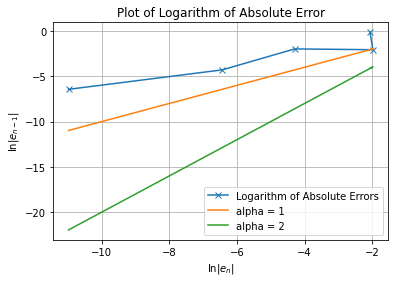

In [145]:
plt.plot(erNew, erpNew[0:-1], marker='x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title('Plot of Logarithm of Absolute Error')
plt.xlabel(r'ln$|e_n|$')
plt.ylabel(r'ln$|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

In [146]:
erNew,erpNew

([-2.0634370688955617,
  -1.9784061917546416,
  -4.293633968437713,
  -6.439130672581364,
  -10.981417419926672],
 [-0.1358387998337526,
  -2.0634370688955617,
  -1.9784061917546416,
  -4.293633968437713,
  -6.439130672581364,
  -10.981417419926672])

In [147]:
# Order of convergence from log plots
slope = (erpNew[-1]-erpNew[-2])/(erNew[-1] - erNew[-2])
slope

1.0

In [148]:
# Order of convergence from log plots
slope = (erpNew[-2]-erpNew[-3])/(erNew[-2] - erNew[-3])
slope

1.0

* From the graph and absolute errors, it is seen that the order of convergence is 1.

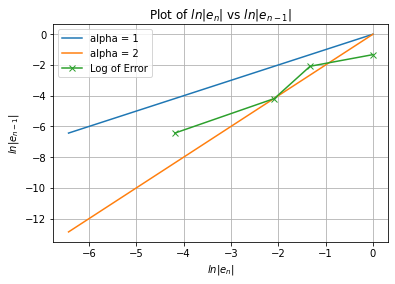

In [149]:
er=np.zeros(Nmax)
for i in range(0,Nmax-1):
    er[i]=np.abs(xn[i+1]-xn[i])
    
erp=np.zeros(Nmax)
for i in range(0,Nmax-1):
    erp[i]=er[i+1]

erSquared = []
for i in range(0,Nmax):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)
        
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)
        
#plt.plot(er, erp, "X", label = 'Log of Error')
plt.plot(erNew, erNew, label = 'alpha = 1')
plt.plot(erNew, erSquared, label = 'alpha = 2')
#y_temp = [i for i in erNew if i is not None]
#y_temp = np.array(y_temp)
#y_temp_1 = 1.618*y_temp
#plt.plot(y_temp, y_temp_1, label = 'alpha = 1.618')
plt.plot(erNew, erpNew, marker = "x", label = 'Log of Error')

plt.title(r'Plot of $ln|e_n|$ vs $ln|e_{n-1}|$')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True)
plt.show()

In [150]:
er,erp

(array([1.        , 0.26530612, 0.12463426, 0.01525301, 0.00161481,
        0.        ]),
 array([0.26530612, 0.12463426, 0.01525301, 0.00161481, 0.        ,
        0.        ]))

In [151]:
erNew,erpNew

([0.0,
  -1.3268709406490895,
  -2.0823717806977746,
  -4.182978582406185,
  -6.4285379470633615,
  None],
 [-1.3268709406490895,
  -2.0823717806977746,
  -4.182978582406185,
  -6.4285379470633615,
  None,
  None])

In [152]:
# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
slope

1.0690050907342

* From the plot and calculation above the order of convergence is 1 for secant's method if log of errors is calculated using approximated roots.

$\pagebreak$

## c) Explain clearly the difference in the convergence behavior between parts a) and b)?

* In (a) the order of convergence is 2.74, while in (b) the order of convergence is 1.
* Netwon's method should give quadratic order of convergence but it is giving 2.74 because of choice of interval and actual root value.
* Secant's method is slower to converge.